## Проект по спринту "Анализ бизнес-показателей"

#### Описание проекта  
  
В нашем распоряжении данные о пользователях развлекательного приложения Procrastinate Pro+  
Данные предоставлены о пользователях привлеченных с 1 мая по 27 октября 2019 года  
В этом проекте мы изучим пользователей приложения - откуда они приходят к нам, какими устройствами пользуются  
Изучим траты на привелечение пользователей из различных источников, сколько денег компании приносит каждый клиент  
Проанализируем в каких случаях расходы на привлечение полизователей окупаются и какие факторы могут мешать привлечению клиентов

#### Этапы проекта  
  
 1. Загрузка данных и библиотек для работы, предобработка данных  
 2. Определение функции для расчёта и анализа LTV, ROI, удержания и конверсии  
 3. Исследовательский анализ данных  
 4. Маркетинговый анализ  
 5. Анализ параметров LTV, ROI и CAC   

### 1. Загрузка данных и библиотек python для работы, предобработка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

In [2]:
try:
    visits = pd.read_csv(
        'C:/Users/kiselevvs/Desktop/Data analyst/datasets/visits_info_short.csv',
        parse_dates=['Session Start', 'Session End'])
    orders = pd.read_csv(
        'C:/Users/kiselevvs/Desktop/Data analyst/datasets/orders_info_short.csv',
        parse_dates=['Event Dt'])
    costs = pd.read_csv('C:/Users/kiselevvs/Desktop/Data analyst/datasets/costs_info_short.csv')
except:
    visits = pd.read_csv(
        'https://', 
         parse_dates=['Session Start', 'Session End'])
    orders = pd.read_csv(
        'https://',
        parse_dates=['Event Dt'])
    costs = pd.read_csv('https://')
    

In [3]:
print(visits.head())
print()
print(orders.head())
print()
print(costs.head())

        User Id         Region   Device  Channel       Session Start  \
0  981449118918  United States   iPhone  organic 2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic 2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic 2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop 2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic 2019-05-01 03:33:35   

          Session End  
0 2019-05-01 02:45:01  
1 2019-05-01 04:47:35  
2 2019-05-01 15:32:08  
3 2019-05-01 00:54:25  
4 2019-05-01 03:57:40  

        User Id            Event Dt  Revenue
0  188246423999 2019-05-01 23:09:52     4.99
1  174361394180 2019-05-01 12:24:04     4.99
2  529610067795 2019-05-01 11:34:04     4.99
3  319939546352 2019-05-01 15:34:40     4.99
4  366000285810 2019-05-01 13:59:51     4.99

           dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  13

In [4]:
display(visits.head())

display(orders.head())

display(costs.head())

User Id         Region   Device  Channel       Session Start  \
0  981449118918  United States   iPhone  organic 2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic 2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic 2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop 2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic 2019-05-01 03:33:35   

          Session End  
0 2019-05-01 02:45:01  
1 2019-05-01 04:47:35  
2 2019-05-01 15:32:08  
3 2019-05-01 00:54:25  
4 2019-05-01 03:57:40

User Id            Event Dt  Revenue
0  188246423999 2019-05-01 23:09:52     4.99
1  174361394180 2019-05-01 12:24:04     4.99
2  529610067795 2019-05-01 11:34:04     4.99
3  319939546352 2019-05-01 15:34:40     4.99
4  366000285810 2019-05-01 13:59:51     4.99

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

In [5]:
print(visits.info())
print()
print(orders.info())
print()
print(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   User Id        309901 non-null  int64         
 1   Region         309901 non-null  object        
 2   Device         309901 non-null  object        
 3   Channel        309901 non-null  object        
 4   Session Start  309901 non-null  datetime64[ns]
 5   Session End    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   User Id   40212 non-null  int64         
 1   Event Dt  40212 non-null  datetime64[ns]
 2   Revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage

Вывели первые строчки каждой таблицы на экран и посмотрели общую информацию по типам данных  
Пропусков в данных нет  
Для полей с данными о дате и времени добавим параметр parse_dates при загрузке для перевода этих полей в тип данных datetime

In [6]:
visits.columns = visits.columns.str.lower()
visits = visits.rename(columns={'user id': 'user_id', 'session start': 'session_start', 'session end': 'session_end'})
orders.columns = orders.columns.str.lower()
orders = orders.rename(columns={'user id': 'user_id', 'event dt': 'event_dt'})
costs.columns = costs.columns.str.lower()

Изменили наименования столбцов - перевели в "змеиный регистр" и поменяли заглавные буквы на строчные

In [7]:
print(visits.info())
print()
print(orders.info())
print()
print(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage

In [8]:
print(f' Количество явных дубликатов в данных датасета visits равно {visits.duplicated().sum()}')
print()
print(f' Количество явных дубликатов в данных датасета orders равно {orders.duplicated().sum()}')
print()
print(f' Количество явных дубликатов в данных датасета costs равно {costs.duplicated().sum()}')

 Количество явных дубликатов в данных датасета visits равно 0

 Количество явных дубликатов в данных датасета orders равно 0

 Количество явных дубликатов в данных датасета costs равно 0


Проверили наличие явных дубликатов в данных - отсутствуют

#### Подвывод по 1 разделу  
  
  - Произвели загрузку табличных данных  
  - Провели предобработку - данные не содержат пропусков и явных дубликатов  
  - изменили наименования столбцов на общепринятый "змеиный" регистр  
  
  **Переходим к разделу 2**

### 2. Определение функции для расчёта и анализа LTV, ROI, удержания и конверсии

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

##### Зададим все функции для вычисления значения метрик

In [9]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].values.astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

        # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

***Так как в имеющихся данных у нас нет датасета events о событиях, то я удалил его упоминание в оперделении функции и в заданном в теории коде***

In [10]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [11]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [12]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [13]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [14]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [15]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [16]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

###### Задали функции для расчета параметров и их визуализации  

**Переходим к исследовательскому анализу данных**

### 3. Исследовательский анализ данных

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

In [17]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

***Проблему с переводом столбца costs['dt'] в формат datetimens описал выше при загрузке данных***   
А, если его не перевести, pd.to_datetime(costs['dt']).dt.date, как было показано в теории, то acquisition_cost счиатется не корректно - везде нули  
Не понимаю, почему функция не работает корректно при переводе в дату сразу при загрузке данных

In [18]:
profiles = get_profiles(visits, orders, ad_costs = costs)
profiles.head(10)

user_id            first_ts       channel   device         region  \
0    599326 2019-05-07 20:58:57      FaceBoom      Mac  United States   
1   4919697 2019-07-09 12:46:07      FaceBoom   iPhone  United States   
2   6085896 2019-10-01 09:58:33       organic   iPhone         France   
3  22593348 2019-08-22 21:35:48    AdNonSense       PC        Germany   
4  31989216 2019-10-02 00:07:44       YRabbit   iPhone  United States   
5  34186288 2019-05-09 17:29:23       organic  Android  United States   
6  38448301 2019-08-16 11:56:00       organic  Android  United States   
7  46006712 2019-06-30 03:46:29    AdNonSense  Android         France   
8  58263264 2019-05-11 19:18:43      FaceBoom   iPhone  United States   
9  59835779 2019-05-11 21:13:47  MediaTornado   iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769  
5  2019-05-09 2019-05-01  False          0.000000  
6  2019-08-16 2019-08-01  False          0.000000  
7  2019-06-30 2019-06-01   True          1.008000  
8  2019-05-11 2019-05-01  False          1.128205  
9  2019-05-11 2019-05-01  False          0.250435

Получили таблицу **profiles** с данными о канале, дате и стоимости привлечения пользователей

In [19]:
min_date = profiles['dt'].min()
max_date = profiles['dt'].max() 
print(f'Минимальная дата привлечения пользователя - {min_date}')
print()
print(f'Максимальная дата привлечения пользователя - {max_date} (момент анализа)')

Минимальная дата привлечения пользователя - 2019-05-01

Максимальная дата привлечения пользователя - 2019-10-27 (момент анализа)


In [20]:
countries = profiles['region'].unique()
print(f'Список стран пользователей приложения: {countries}')
print()
countries = profiles['device'].unique()
print(f'Список устройств пользователей приложения: {countries}')
print()
countries = profiles['channel'].unique()
print(f'Список каналов привлечения пользователей приложения: {countries}')

Список стран пользователей приложения: ['United States' 'France' 'Germany' 'UK']

Список устройств пользователей приложения: ['Mac' 'iPhone' 'PC' 'Android']

Список каналов привлечения пользователей приложения: ['FaceBoom' 'organic' 'AdNonSense' 'YRabbit' 'MediaTornado'
 'RocketSuperAds' 'LeapBob' 'TipTop' 'WahooNetBanner' 'OppleCreativeMedia'
 'lambdaMediaAds']


In [21]:
top_payer_countries = (
    profiles.query('payer == True')
    .groupby('region')
    .agg({'user_id': 'nunique'})
    .sort_values(by='user_id', ascending=False)
    .rename(columns={'user_id': 'number_users'})
    .reset_index()
    )
top_payer_devices = (
    profiles.query('payer == True')
    .groupby('device')
    .agg({'user_id': 'nunique'})
    .sort_values(by='user_id', ascending=False)
    .rename(columns={'user_id': 'number_users'})
    .reset_index()
    )
top_payer_channels = (
    profiles.query('payer == True')
    .groupby('channel')
    .agg({'user_id': 'nunique'})
    .sort_values(by='user_id', ascending=False)
    .rename(columns={'user_id': 'number_users'})
    .reset_index()
    )
print(top_payer_countries)
print()
print(top_payer_devices)
print()
print(top_payer_channels)

          region  number_users
0  United States          6902
1             UK           700
2         France           663
3        Germany           616

    device  number_users
0   iPhone          3382
1  Android          2050
2      Mac          1912
3       PC          1537

               channel  number_users
0             FaceBoom          3557
1               TipTop          1878
2              organic          1160
3       WahooNetBanner           453
4           AdNonSense           440
5       RocketSuperAds           352
6              LeapBob           262
7   OppleCreativeMedia           233
8       lambdaMediaAds           225
9              YRabbit           165
10        MediaTornado           156


Вывели топ количеству платящих пользователей:
- **топ стран** -  USA уверенный лидер с 6902 пользователями, совершавшими оплату в приложении
- **топ устройств** -  iPhone лидер с 3382 пользователями, совершавшими оплату в приложении
- **топ каналов привлечения** -  FaceBoom уверенный лидер с 6902 пользователями, совершавшими оплату в приложении

In [22]:
top_payer_countries = (
    profiles.groupby('region')
    .agg({'user_id': 'nunique', 'payer': 'mean'})
    .sort_values(by='payer', ascending=False)
    .rename(columns={'user_id': 'number_users', 'payer': 'payer_fraction' })
    .reset_index()
    )
top_payer_devices = (
    profiles.groupby('device')
    .agg({'user_id': 'nunique', 'payer': 'mean'})
    .sort_values(by='payer', ascending=False)
    .rename(columns={'user_id': 'number_users', 'payer': 'payer_fraction' })
    .reset_index()
    )
top_payer_channels = (
    profiles.groupby('channel')
    .agg({'user_id': 'nunique', 'payer': 'mean'})
    .sort_values(by='payer', ascending=False)
    .rename(columns={'user_id': 'number_users', 'payer': 'payer_fraction' })
    .reset_index()
    )
print(top_payer_countries)
print()
print(top_payer_devices)
print()
print(top_payer_channels)

          region  number_users  payer_fraction
0  United States        100002        0.069019
1        Germany         14981        0.041119
2             UK         17575        0.039829
3         France         17450        0.037994

    device  number_users  payer_fraction
0      Mac         30042        0.063644
1   iPhone         54479        0.062079
2  Android         35032        0.058518
3       PC         30455        0.050468

               channel  number_users  payer_fraction
0             FaceBoom         29144        0.122049
1           AdNonSense          3880        0.113402
2       lambdaMediaAds          2149        0.104700
3               TipTop         19561        0.096007
4       RocketSuperAds          4448        0.079137
5       WahooNetBanner          8553        0.052964
6              YRabbit          4312        0.038265
7         MediaTornado          4364        0.035747
8              LeapBob          8553        0.030633
9   OppleCreativeMedia      

Построили таблицы с общим количеством пользователей и долей платящих для:
- **стран** -  USA лидер по количеству пользователей и заметный лидер по доле пользователей совершавших покупку
- **устройств** -  доля пользователей совершавших покупку на Mac немногим больше лидера по количеству платящих пользователей на Iphoine
- **каналов привлечения** -  FaceBoom лидер по количеству привлеченных платящих пользователей и лидер по доле пользователей совершавших покупку

#### Подвывод по исследовательскому анализу данных

Посмотрели страны, устройства и каналы привлечения пользователей рассматриваемого приложения. 
  
Вывели лидеров по количеству платящих пользователей и лидеров по доле пользователей совершавших покупку в приложении.  
Данная информация может помочь увеличить продажи и акцентировать внимание на точках роста продукта. 
  
USA является уверенным лидеров и по количеству пользователей и по количеству платящих пользователей, далее идут UK, France, Germany пользователи из которых при правильном подхожде могут стать заметными точками роста для продукта. 
  
Среди пользователей iphone больше платящих, чем среди пользователей других устройств, но доля платящих или конверсия выше у Mac.   
  
Заметным лидером по привелечению пользователей является FaceBoom с хорошей конверсией пользователей в платящих.

### 4. Маркетинговый анализ

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

In [23]:
mark_summ = profiles['acquisition_cost'].sum()
print(f'Общая сумма расходов на маркетинг(привлечение пользователей) составила {mark_summ}', )

Общая сумма расходов на маркетинг(привлечение пользователей) составила 105497.29999999999


In [24]:
acquisition_cost_channels = (
    profiles.groupby('channel')
    .agg({'acquisition_cost': 'sum'})
    .sort_values('acquisition_cost', ascending=False)
)
acquisition_cost_channels['percentage'] = (
    acquisition_cost_channels['acquisition_cost'] / acquisition_cost_channels['acquisition_cost'].sum()
)
acquisition_cost_channels

acquisition_cost  percentage
channel                                         
TipTop                      54751.30    0.518983
FaceBoom                    32445.60    0.307549
WahooNetBanner               5151.00    0.048826
AdNonSense                   3911.25    0.037074
OppleCreativeMedia           2151.25    0.020392
RocketSuperAds               1833.00    0.017375
LeapBob                      1797.60    0.017039
lambdaMediaAds               1557.60    0.014764
MediaTornado                  954.48    0.009047
YRabbit                       944.22    0.008950
organic                         0.00    0.000000

Видим список источников с общими суммами трат на маркетинг FaceBoom был лидеров по привлеченным пользователям с наибольшей конверсией, но траты на него не максимальные - 1.5 раза меньше, чем на TipTop

In [25]:
mark_test = profiles
mark_test = mark_test.query('channel != "organic"')
mark_test['week'] = mark_test['first_ts'].dt.isocalendar().week
mark_test['month'] = mark_test['first_ts'].dt.month
mark_test.head()

C:\Users\kiselevvs\AppData\Local\Temp\ipykernel_39332\275281497.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mark_test['week'] = mark_test['first_ts'].dt.isocalendar().week
C:\Users\kiselevvs\AppData\Local\Temp\ipykernel_39332\275281497.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mark_test['month'] = mark_test['first_ts'].dt.month


user_id            first_ts     channel   device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom      Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom   iPhone  United States   
3  22593348 2019-08-22 21:35:48  AdNonSense       PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit   iPhone  United States   
7  46006712 2019-06-30 03:46:29  AdNonSense  Android         France   

           dt  month  payer  acquisition_cost  week  
0  2019-05-07      5   True          1.088172    19  
1  2019-07-09      7  False          1.107237    28  
3  2019-08-22      8  False          0.988235    34  
4  2019-10-02     10  False          0.230769    40  
7  2019-06-30      6   True          1.008000    26

Добавили столбец с номером недели для группировки по неделям, так как рассматриваемый период только в 2019 году, то столбец с годом для группировки дополнительно по году добавлять не нужно  
Также для визуализации трат на маркетинг убрали канал "organic"

In [26]:
mark_test_week = mark_test.pivot_table(index='week', columns='channel', values='acquisition_cost', aggfunc='sum')
mark_test_month = mark_test.pivot_table(index='month', columns='channel', values='acquisition_cost', aggfunc='sum')
mark_test_week.head()

channel  AdNonSense  FaceBoom  LeapBob  MediaTornado  OppleCreativeMedia  \
week                                                                       
18           211.05     535.7    16.80         38.64               24.00   
19           273.00     750.2    31.71         61.68               34.50   
20           265.65     755.7    26.67         59.04               27.50   
21           266.70     722.7    26.67         50.16               34.25   
22           202.65    1208.9    65.52         36.96               81.75   

channel  RocketSuperAds  TipTop  WahooNetBanner  YRabbit  lambdaMediaAds  
week                                                                      
18               99.450   347.0            49.2     52.2            81.6  
19              139.230   470.0            92.4     75.9           103.2  
20              138.060   454.0            90.0     69.3            90.4  
21              131.040   801.8            79.2     65.4           119.2  
22               97.695  1421.2           179.4     49.8            83.2

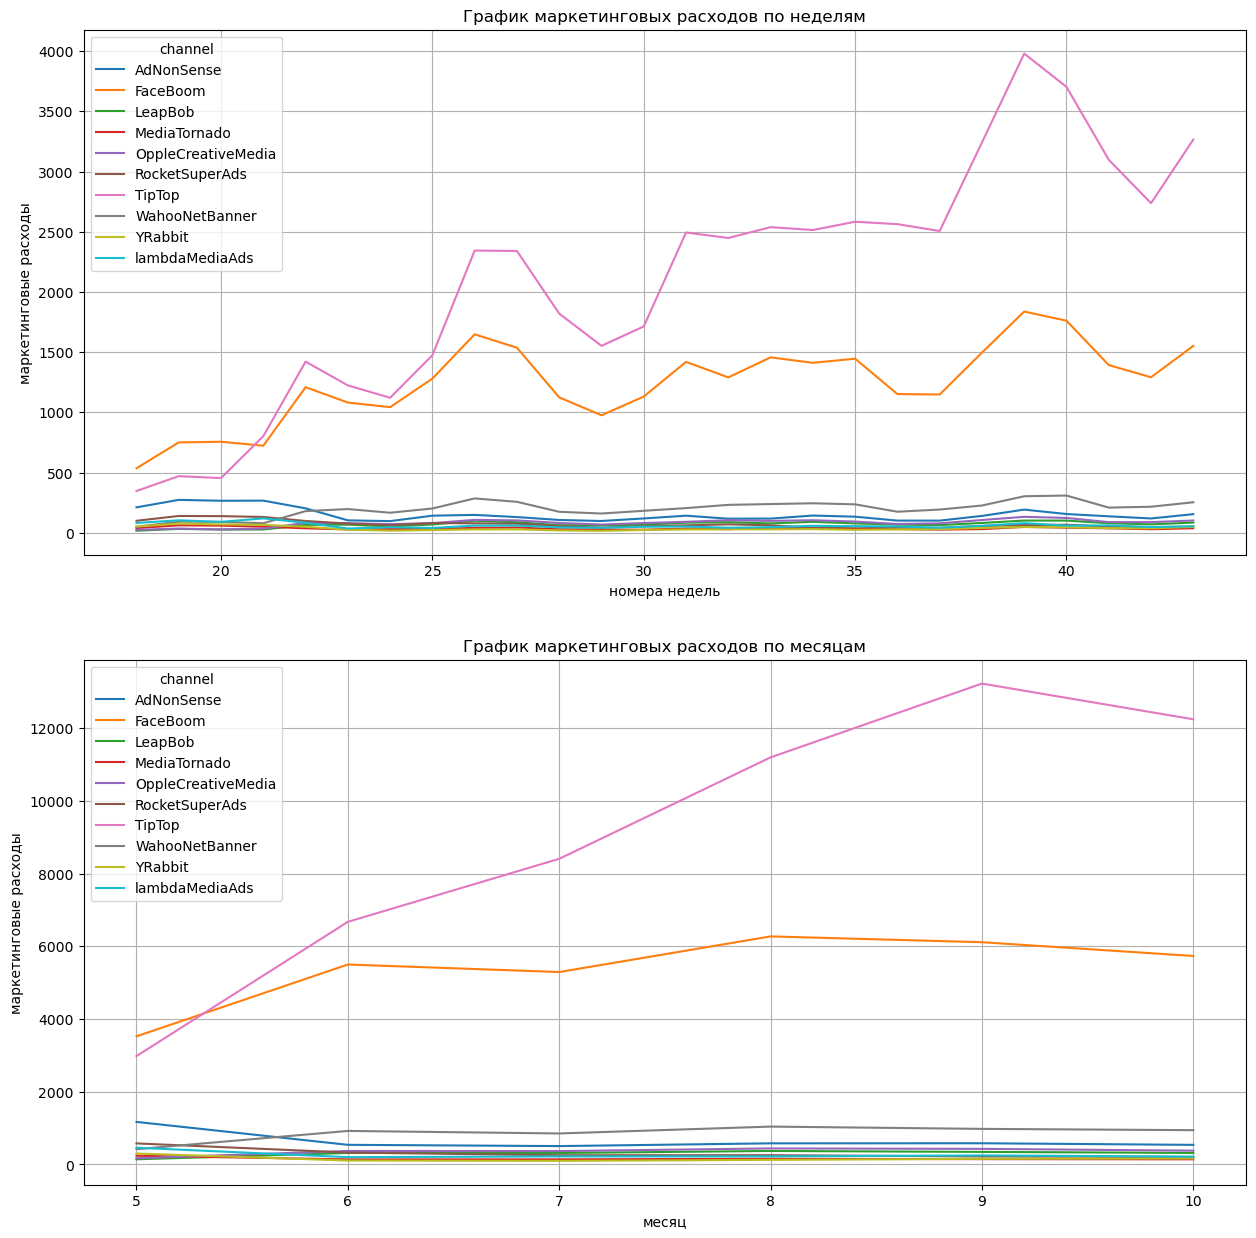

In [27]:
ax1 =plt.subplot(2, 1, 1)
mark_test_week.plot(grid=True, figsize=(15,15), ax=ax1)
plt.title('График маркетинговых расходов по неделям')
plt.xlabel('номера недель')
plt.ylabel('маркетинговые расходы');
ax2 =plt.subplot(2, 1, 2)
mark_test_month.plot(grid=True, figsize=(15,15), ax=ax2)
plt.title('График маркетинговых расходов по месяцам')
plt.xlabel('месяц')
plt.ylabel('маркетинговые расходы');

по графику видим, что затраты на маркетинг в FaceBoom и TipTop в разы выше, чем в остальных источниках  
Затраты на рекламу в последнюю неделю стали расти, но вцелом по последнему месяцу затраты меньше чем ранее  
Также видим заметный спад расходов на рекламу в TipTop, возможно это стало причиной снижения количества привлеченных пользователей и снижения прибыли продута

In [28]:
profiles_cac = profiles.query('channel != "organic"')
cac_for_user = profiles_cac['acquisition_cost'].sum() / profiles_cac['user_id'].nunique() 
print(f'Средняя стоимость привлечения одного пользователя(CAC) составила {cac_for_user}')

Средняя стоимость привлечения одного пользователя(CAC) составила 1.1274813239427588


In [29]:
profiles_cac.groupby('channel').agg({'acquisition_cost': 'mean'}).sort_values('acquisition_cost', ascending = False)


acquisition_cost
channel                             
TipTop                      2.799003
FaceBoom                    1.113286
AdNonSense                  1.008054
lambdaMediaAds              0.724802
WahooNetBanner              0.602245
RocketSuperAds              0.412095
OppleCreativeMedia          0.250000
YRabbit                     0.218975
MediaTornado                0.218717
LeapBob                     0.210172

Видим, что самая высокая стоимость привлечения пользователей у TipTop 2.8 единиц за пользователя, далее идет FaceBoom с показателем в 1.1

#### Подвывод по маркетинговому анализу  
 - Общая сумма расходов на маркетинг составила 105497.3
 - Средняя стоимость привлечения одного пользователя(CAC) составила 1.13
 - FaceBoom лидер по привлеченным пользователям с наибольшей конверсией
 - Затраты на TipTop и FaceBoom заметно выше, чем на остальные источники привлечения

### 5. Анализ параметров LTV, ROI и CAC

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

*****Не стал исключать пользователей Organic из анализа окупаемости рекламы, так как нам важны не цифры,а окупаемость вцелом и в отношении прибыль/затраты*****  
Поэтому то, что пользователи Organic повлияют на среднюю CAC и на остальные моменты нам не важно, а сравнить LTV пользователей Organic с другими может быть полезно

In [30]:
observation_date = datetime(2019, 10, 27).date()
horizon = 14

Моментом анализа приняли последюю дату максимальную дату, которая присутвует в наборе данных, а горизонт приняли равным 14 дней

In [31]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles=profiles_cac ,
    purchases=orders,
    observation_date=observation_date,
    horizon_days = horizon,
    dimensions=[],
    ignore_horizon=False
)


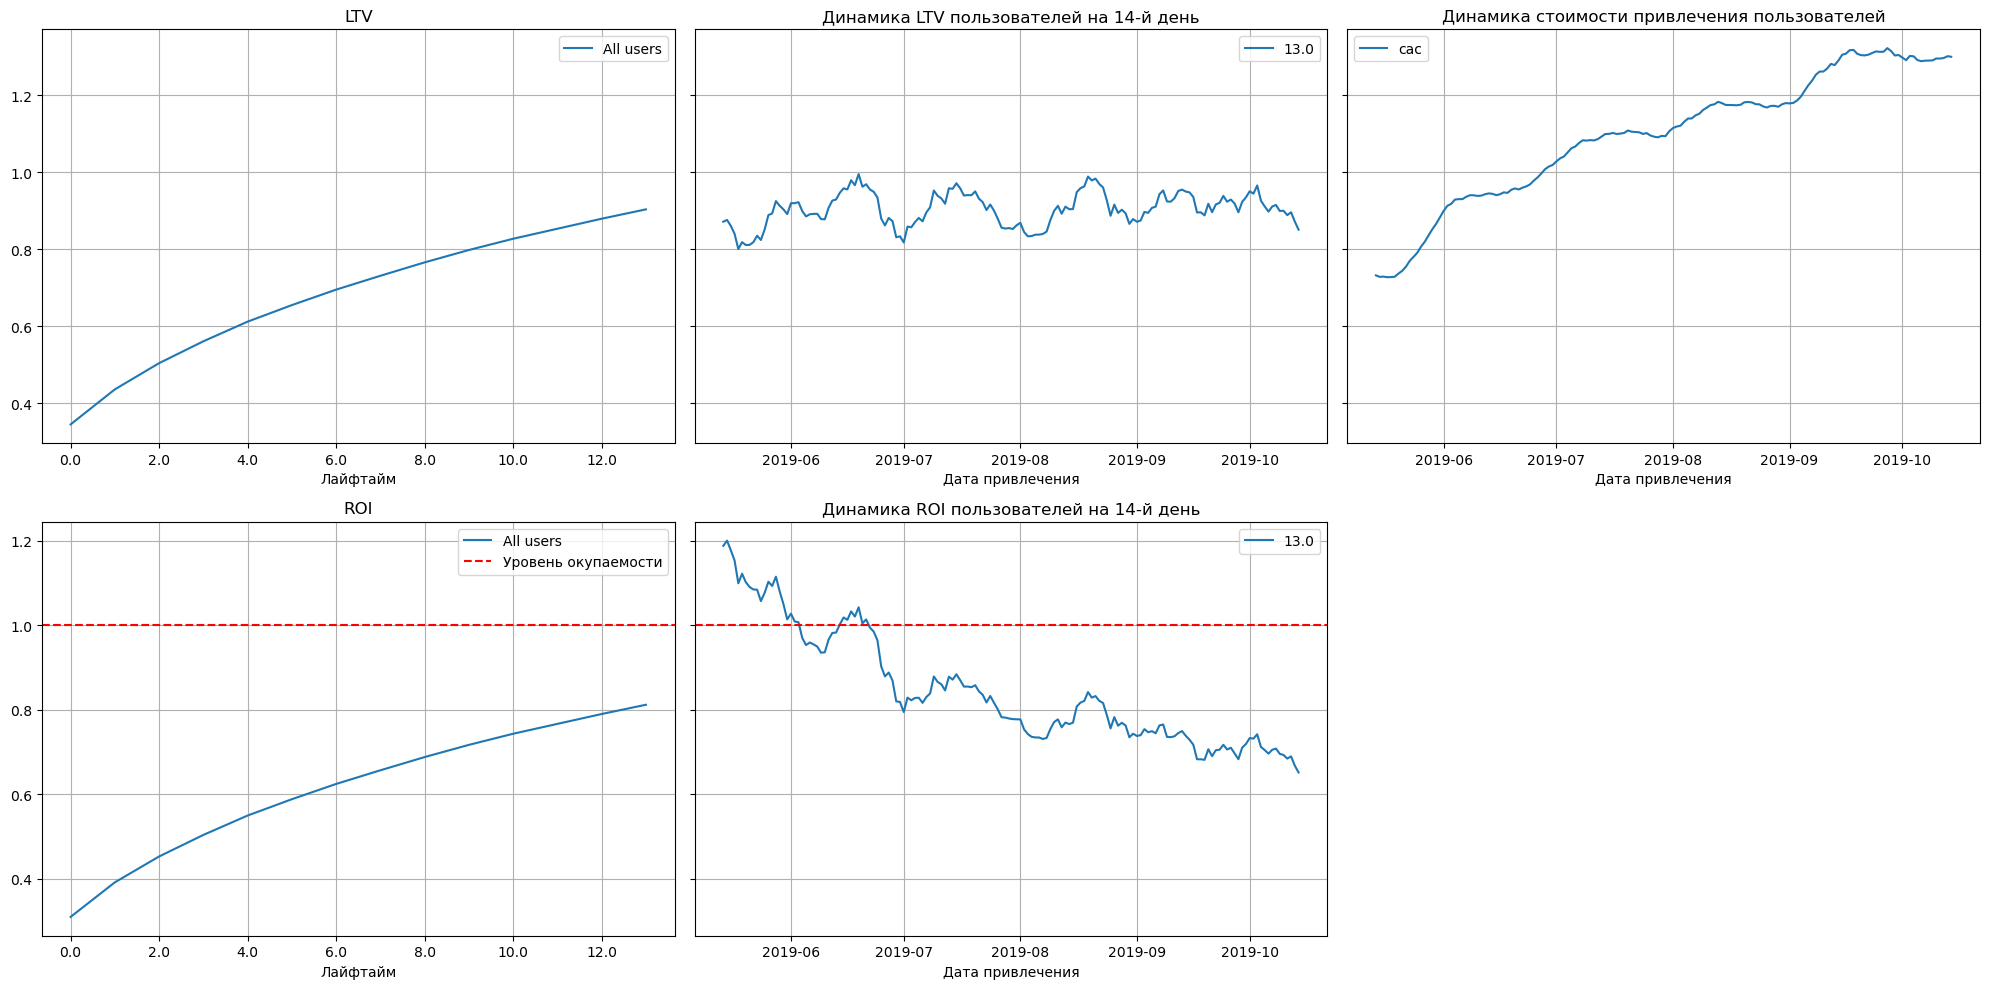

In [32]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon, window=14)

По графикам можно сделать следующие выводы:  
 - Lifetime value (LTV) растет и график похож на ожидаемое-нормальное геометрическое поведение кривой  
 - по динамике LTV на 14 день сильных разбросов или какихто аномалий не замечено
 - динамика CAC(стоимость привлечения) на 14 день имеет сильный разброс от 0.7 до 1.25, что является заметным увеличением и может говорить или о возросших расходамх на рекламу и как следствие увеличение привлеченных пользователей и прибыли, или о пустых тратах на маркетинг  
 - ROI(возврат на инвестици) при увеличении "жизни" пользователя растет, что является целевым и нормальным развитием, НО к 14 дню находится на отметке около 0.85 и является показателем убыточности
 - В графике динамики ROI на 14 день снова замечаем аномалии, мы заметили, что затраты на маркетинг сильно возрастали, а ROI стало заметно падать и упал ниже уровня окупаемости 

In [33]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_cac,
    orders,
    observation_date,
    horizon_days = horizon,
    dimensions=[],
    ignore_horizon=False,
)

In [34]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_cac,
    visits,
    observation_date,
    horizon_days = horizon,
    dimensions=[],
    ignore_horizon=False,
)

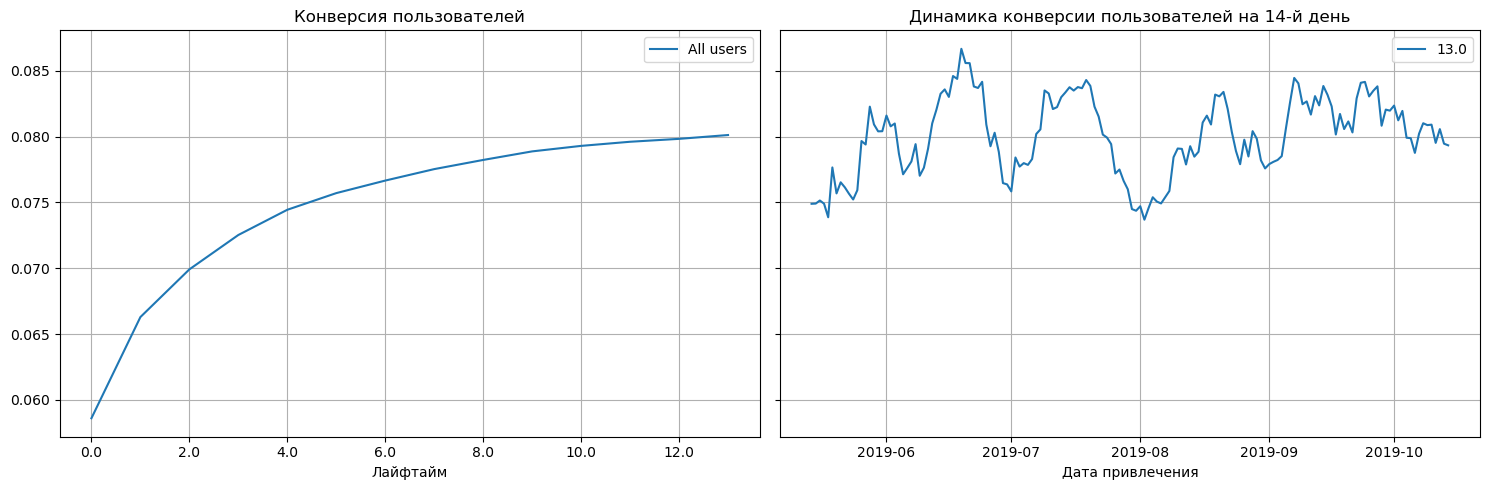

In [35]:
plot_conversion(conversion_grouped, conversion_history, horizon, window=14)

По графикам можно сказать следующее:
 - геометрическая форма линиии конверсии на графике выглядит "нормально", конверсия растет, но медленно и с низкими показателями
 - по графику динамики конверсии на 14 день значительных аномалий нет, есть разброс показателя конверсии, но находится в разумных пределах с низкой конверсией около 0.08

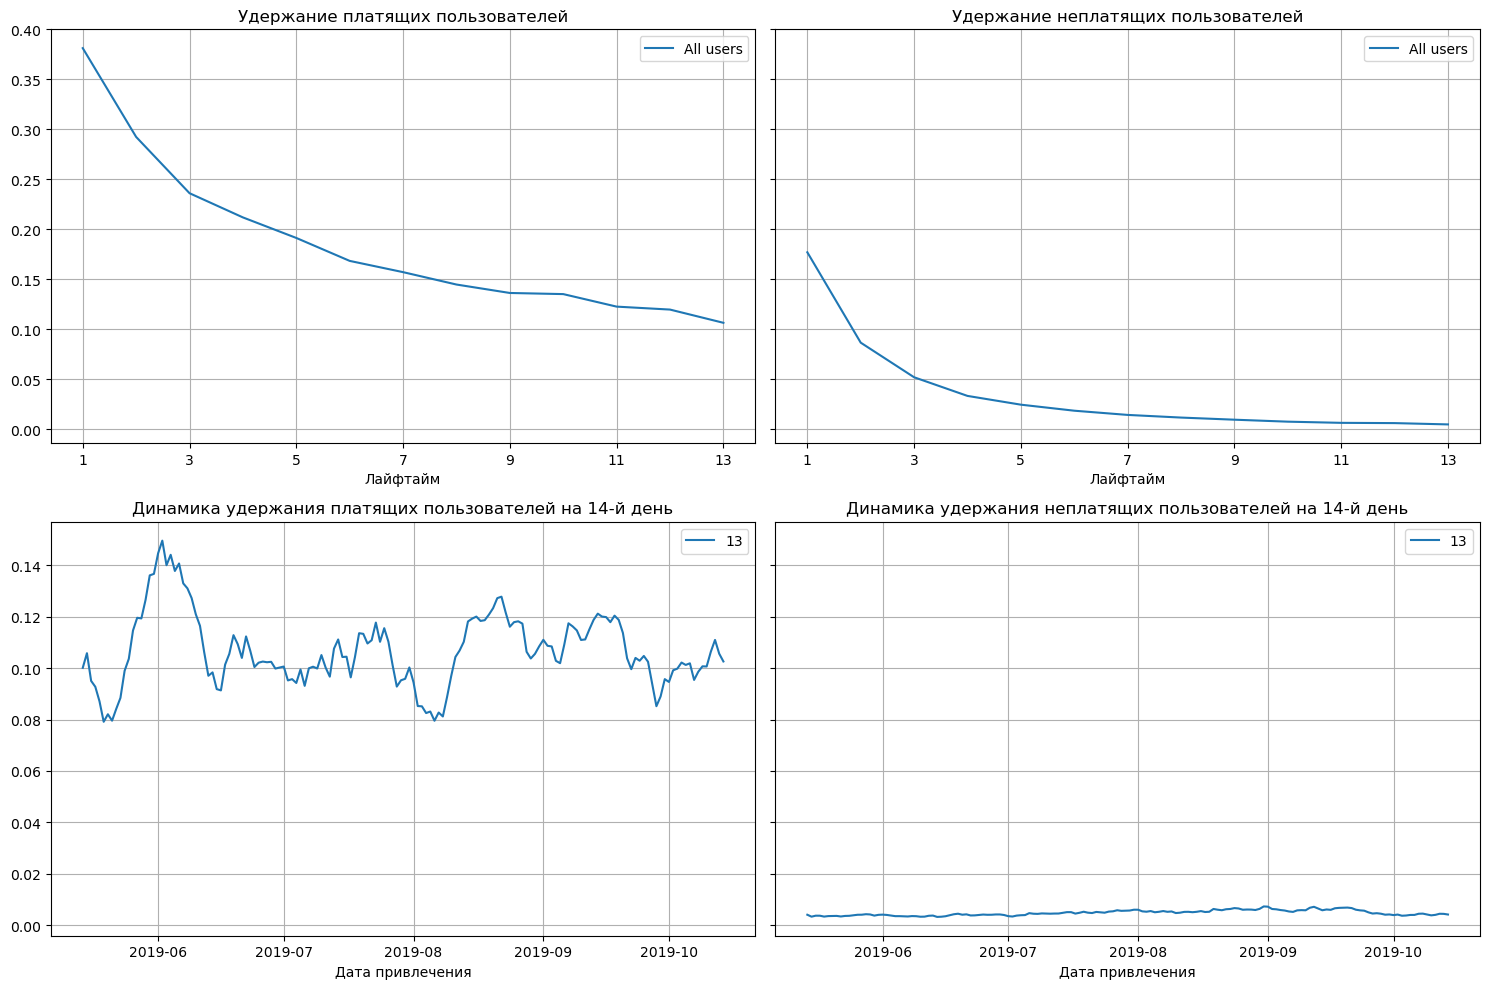

In [36]:
plot_retention(retention_grouped, retention_history, horizon, window=14)

Геометрические формы графиков близки к нормальным, но удержание платящих пользователей начинается с 0.4 в 1 день, что кажется аномально низким, возможно есть какието проблемы у пользователей при "знакомстве" с приложением  
Отсюда видно низкое удержание на 14 день, так как удержвание изначально низкое

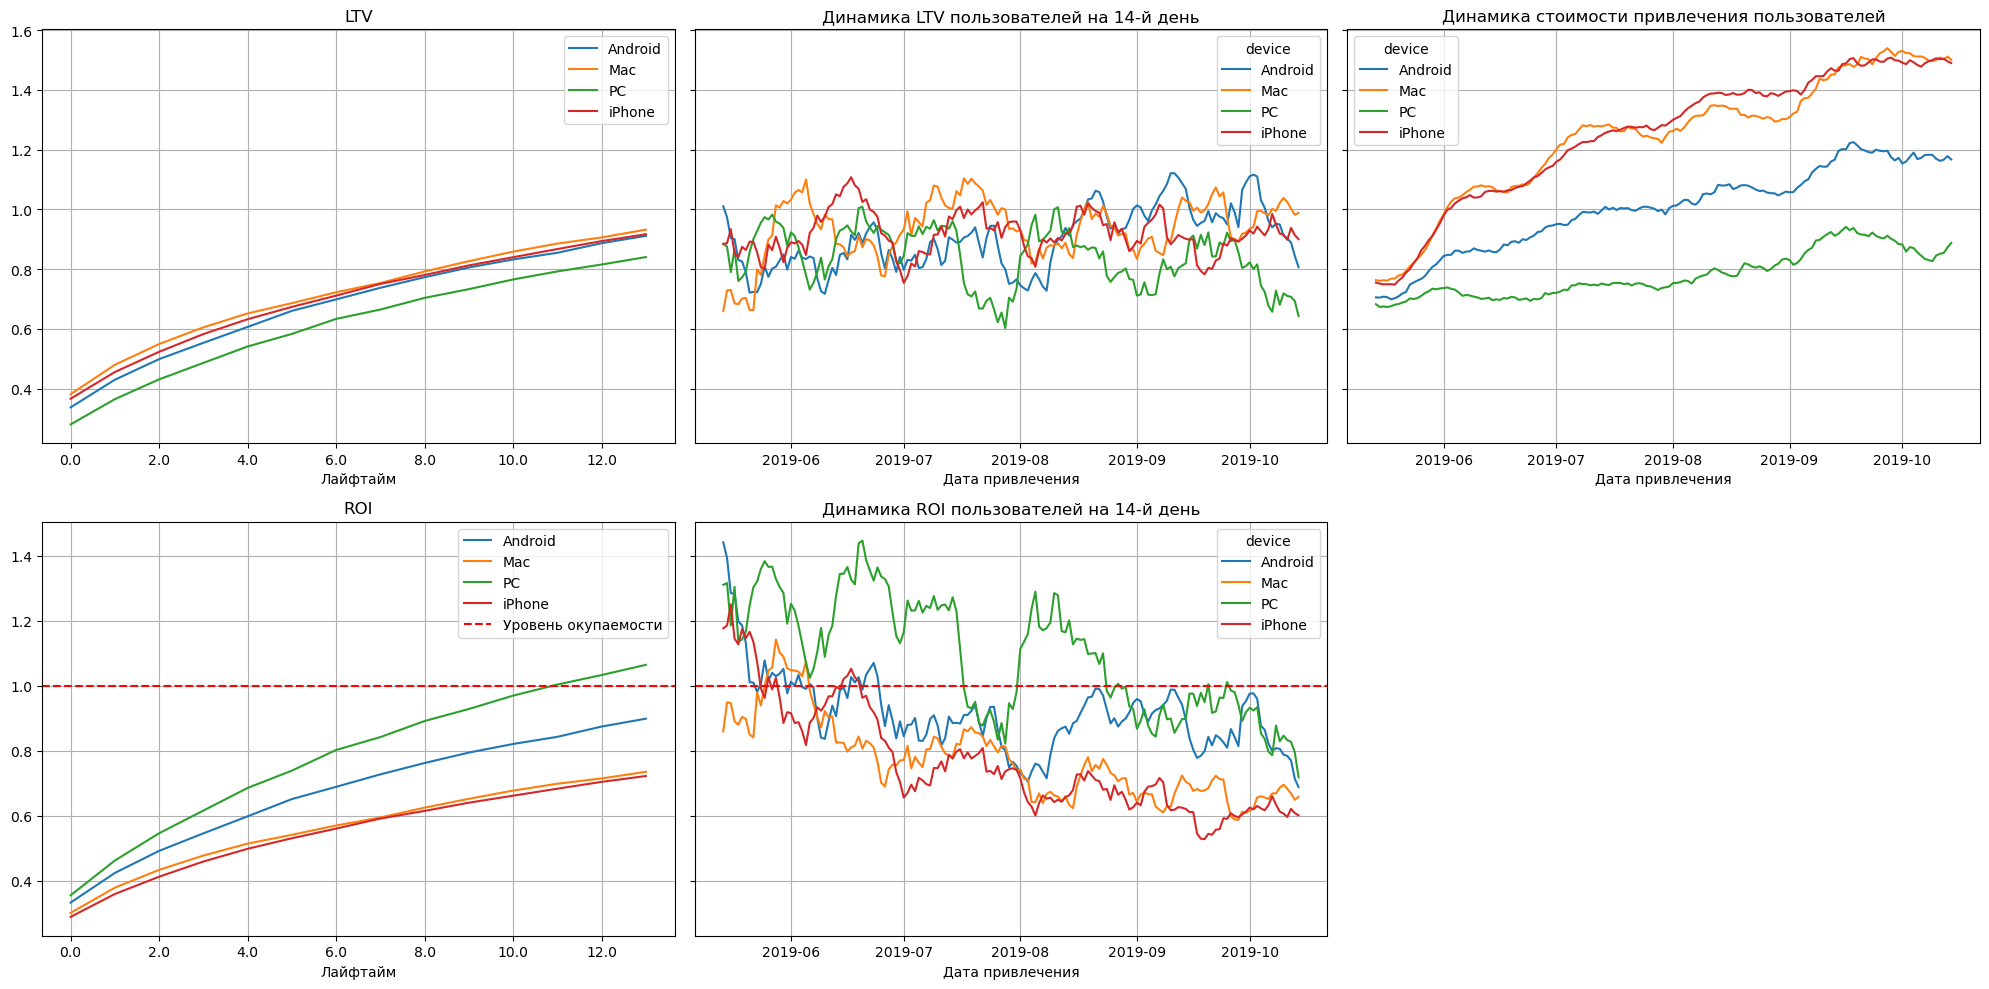

In [37]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles=profiles_cac ,
    purchases=orders,
    observation_date=observation_date,
    horizon_days = horizon,
    dimensions=['device'],
    ignore_horizon=False
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon, window=14)

- по графикам LTV и динамики LTV аномали нет
- по графику стоимости привлечения видим, что затраты на маркетинг постоянно растут, по "яблочным" девайсам в 2 раза от 08. до 1.6 начиная с июня по октябрь, по остальным девайсам рост заметный, но менее сильный
-  ROI выше уровня окупаемости к 14 дню только по ПК, по андроиду на уровне 0.9 к 14 дню, по "яблочным" девайсам около 07-0.8
- по графику динамики ROI видим, что при значительном увеличении рекламного бюджета ROI стало снижаться и к октябрю упало ниже уровня окупаемости по всем девайсам. С учетом максимальных трат на маркетинг на устройства Apple, ROI по этим устройствам ниже остальных

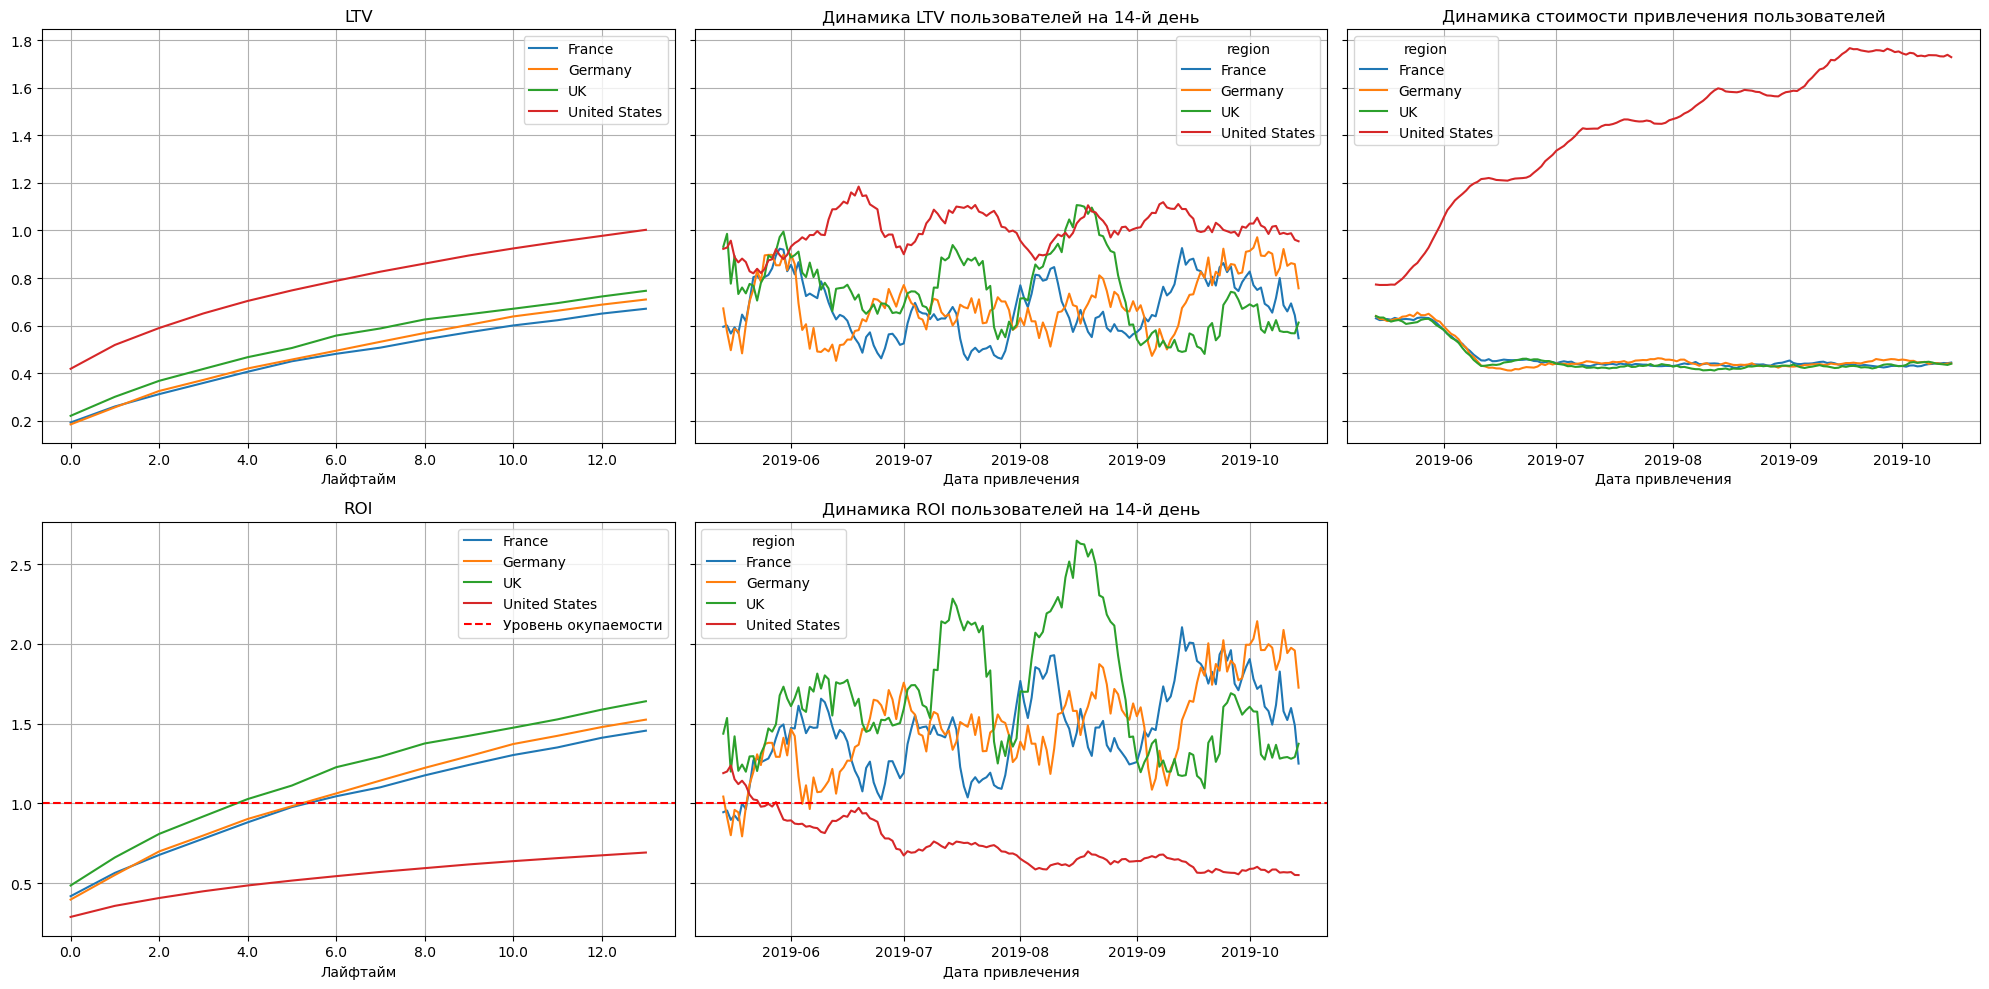

In [38]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles=profiles_cac ,
    purchases=orders,
    observation_date=observation_date,
    horizon_days = horizon,
    dimensions=['region'],
    ignore_horizon=False
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon, window=14)

Построили графики с разбивкой по странам и видим очень интересные и важные для компании факты:
 - LTV у пользователей из USA заметно выше, чем у пользователей из дргуих стран
 - на графике динамики CAC видим, что стоимость привлечения пользователей в USA, начиная с 2019-06 стала резко расти, когда у других стран CAC стала снижаться, но ROI у USA стал снижаться. Это говорит не просто о низкой эффективности рекламы в USA, а об обратно пропорциональной зависимости трат на рекламу и ROI, что свидетельствует о наличии локальных проблем (возможно проблемы после локальных обновлений или ошибок в рекламных данных)

In [39]:
profiles_cac_usa = profiles_cac.query('region == "United States"')

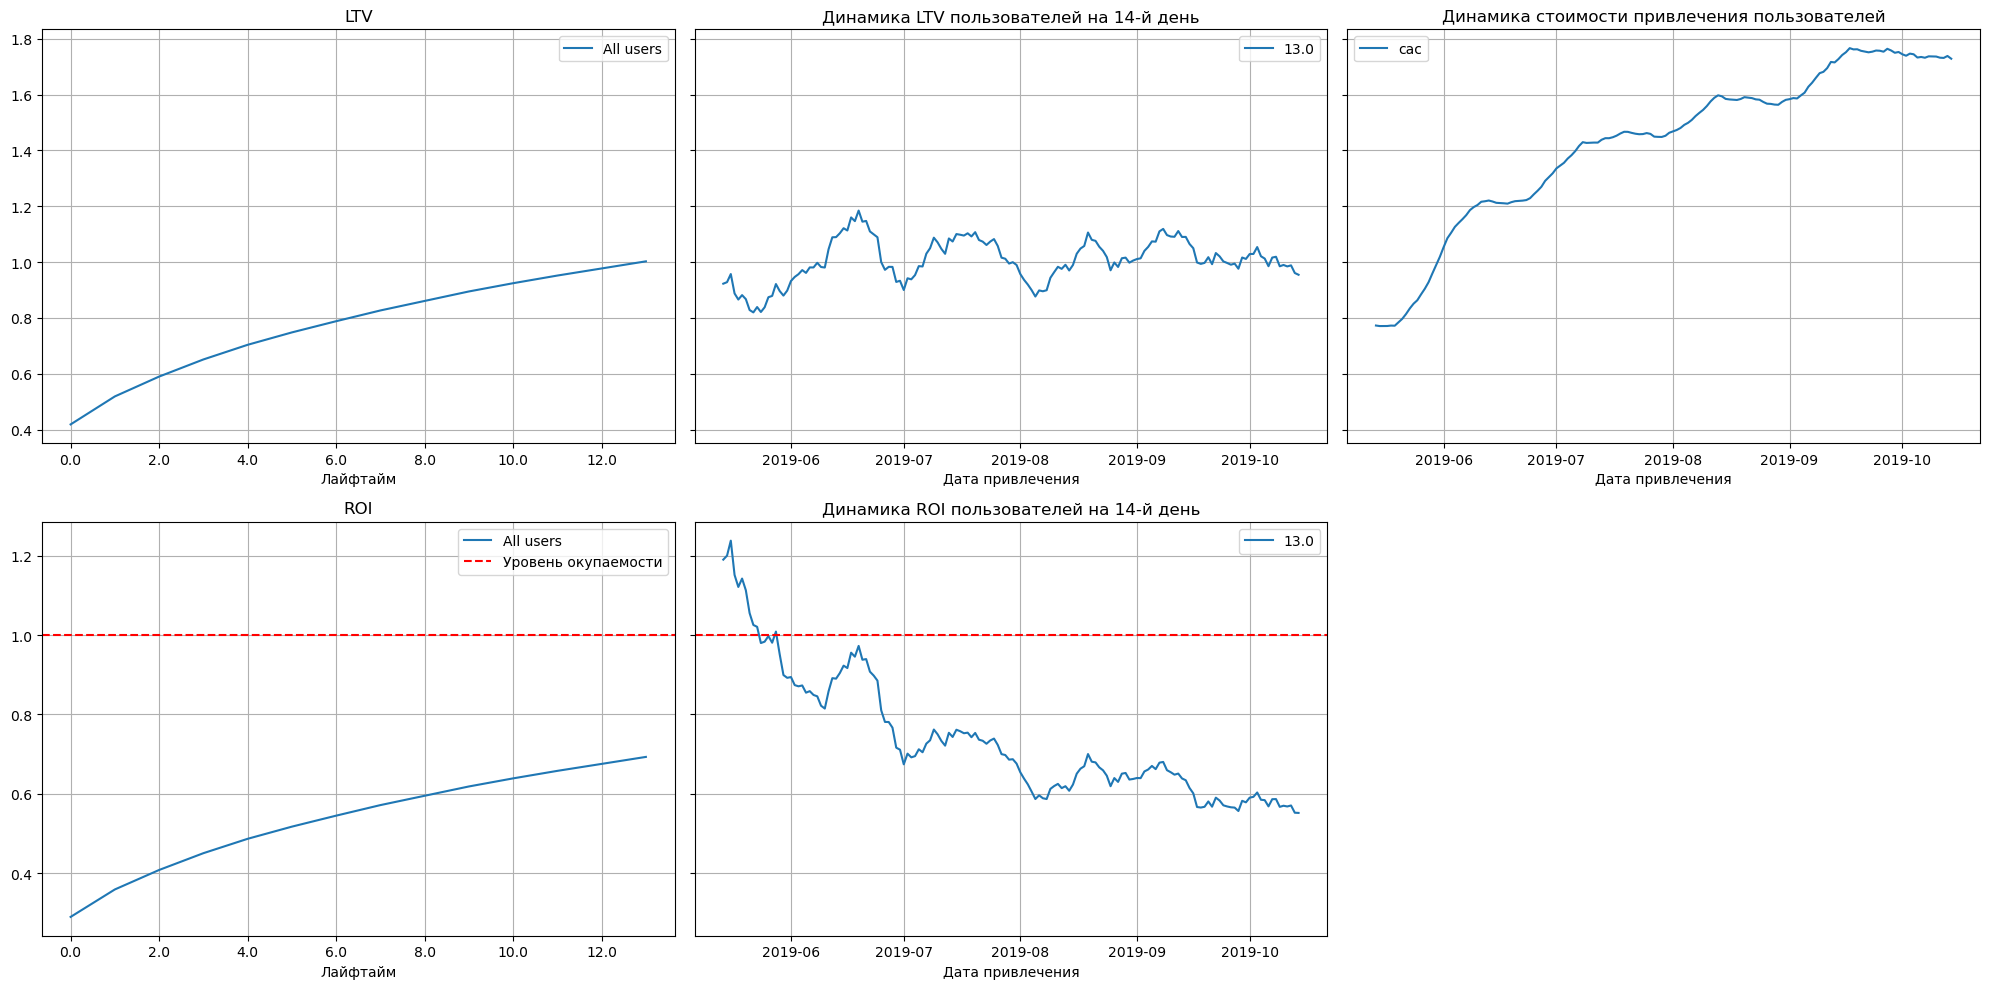

In [40]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles=profiles_cac_usa ,
    purchases=orders,
    observation_date=observation_date,
    horizon_days = horizon,
    dimensions=[],
    ignore_horizon=False
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon, window=14)

По графикам ltv и roi  в разрезе USA видим, что есть проблемы - при постепенном росте LTV к 14 дню "жизни" пользователя, значительном увеличении стоимости привлечения пользоватлеей ROI находится на уровне ниже уровня окупаемости и с июня заметно упал.  
  
**В связи с этим можем сделать вывод, что эффективность рекламы в USA вызывает большие вопросы, стоит с этим разобраться**

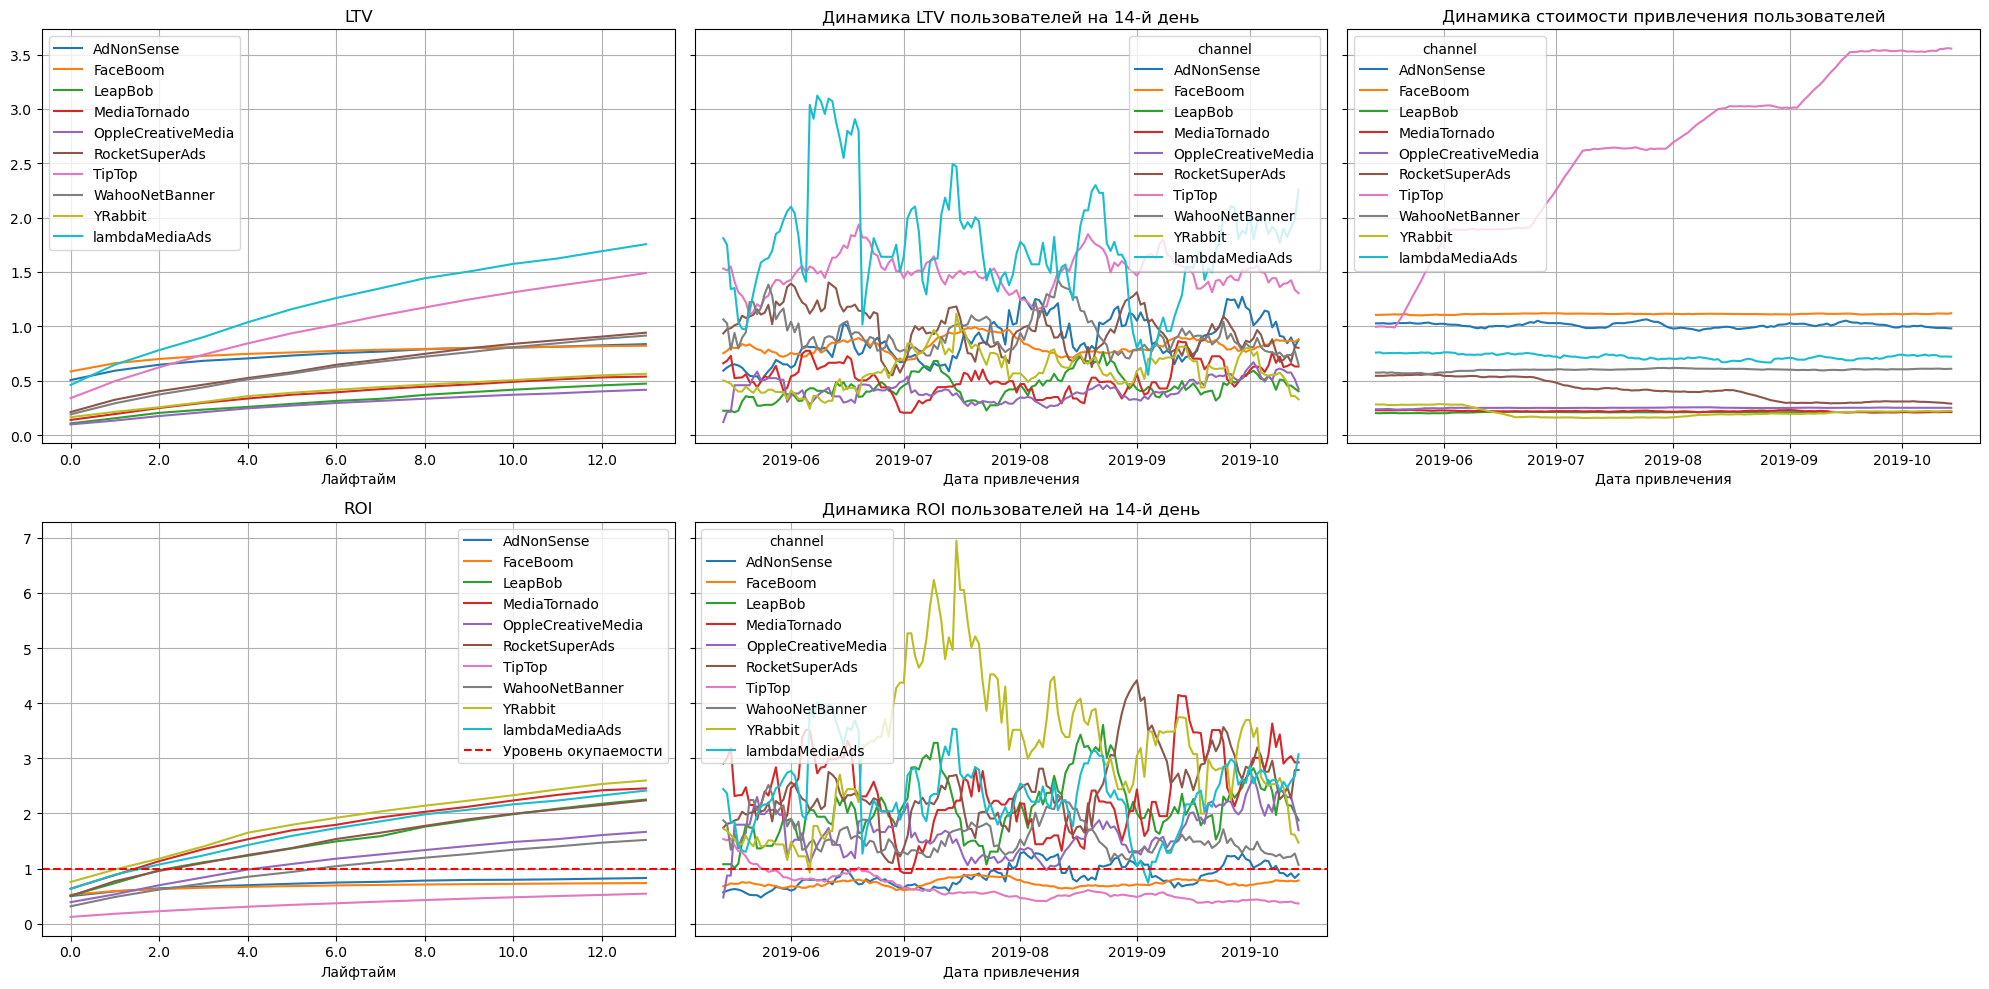

In [41]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles=profiles_cac ,
    purchases=orders,
    observation_date=observation_date,
    horizon_days = horizon,
    dimensions=['channel'],
    ignore_horizon=False
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon, window=14)

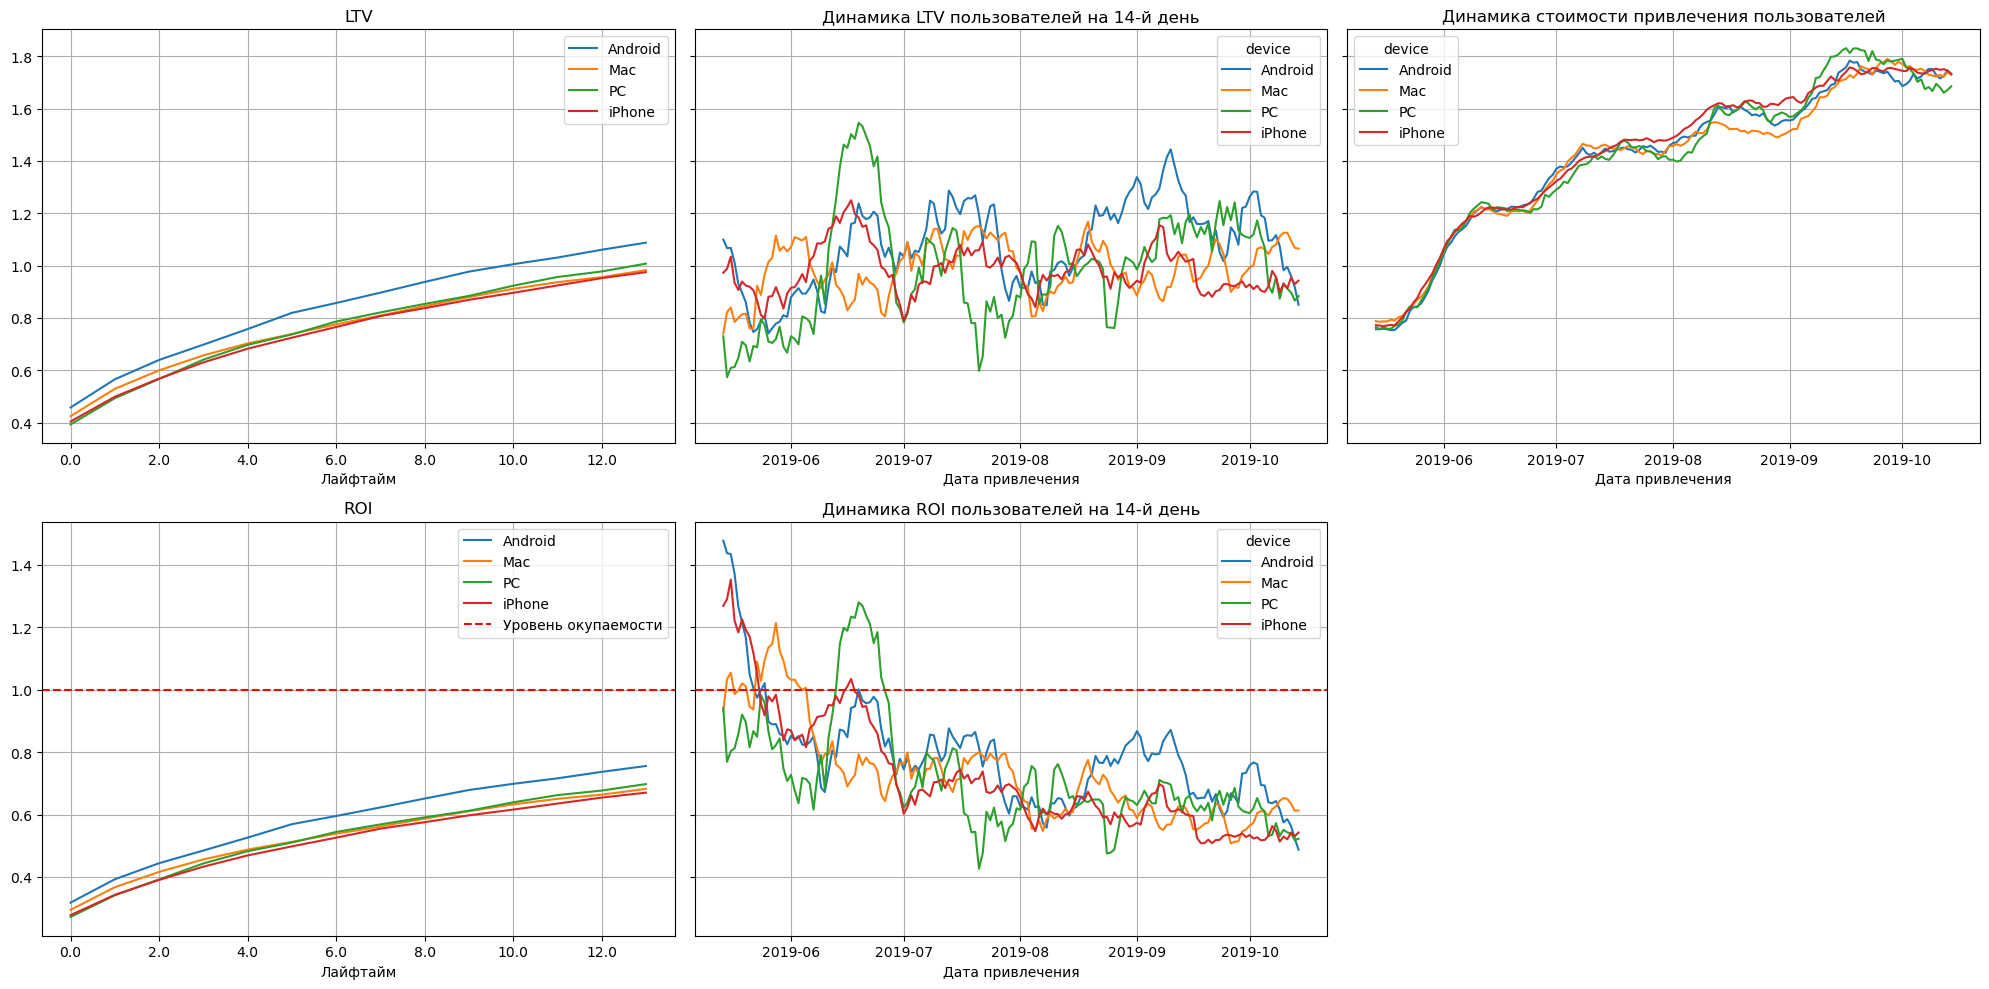

In [42]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles=profiles_cac_usa ,
    purchases=orders,
    observation_date=observation_date,
    horizon_days = horizon,
    dimensions=['device'],
    ignore_horizon=False
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon, window=14)

Построили графики LTV, ROI и их динамики в разрезе USA и с разбивкой по устройствам, можно сказать следующее:  
- начиная с июня окупаемость по всем устройствам ниже уровня окупаемости  
- LTV находится на относительно хороешм уровне, НО CAC постоянно растет от 0.8 в июне дро 1.8 в октябре - очень значительный рост
- рост CAC значителен, вместе с этим ROI падает, **увеличение затрат на рекламу не дает своих плодов**

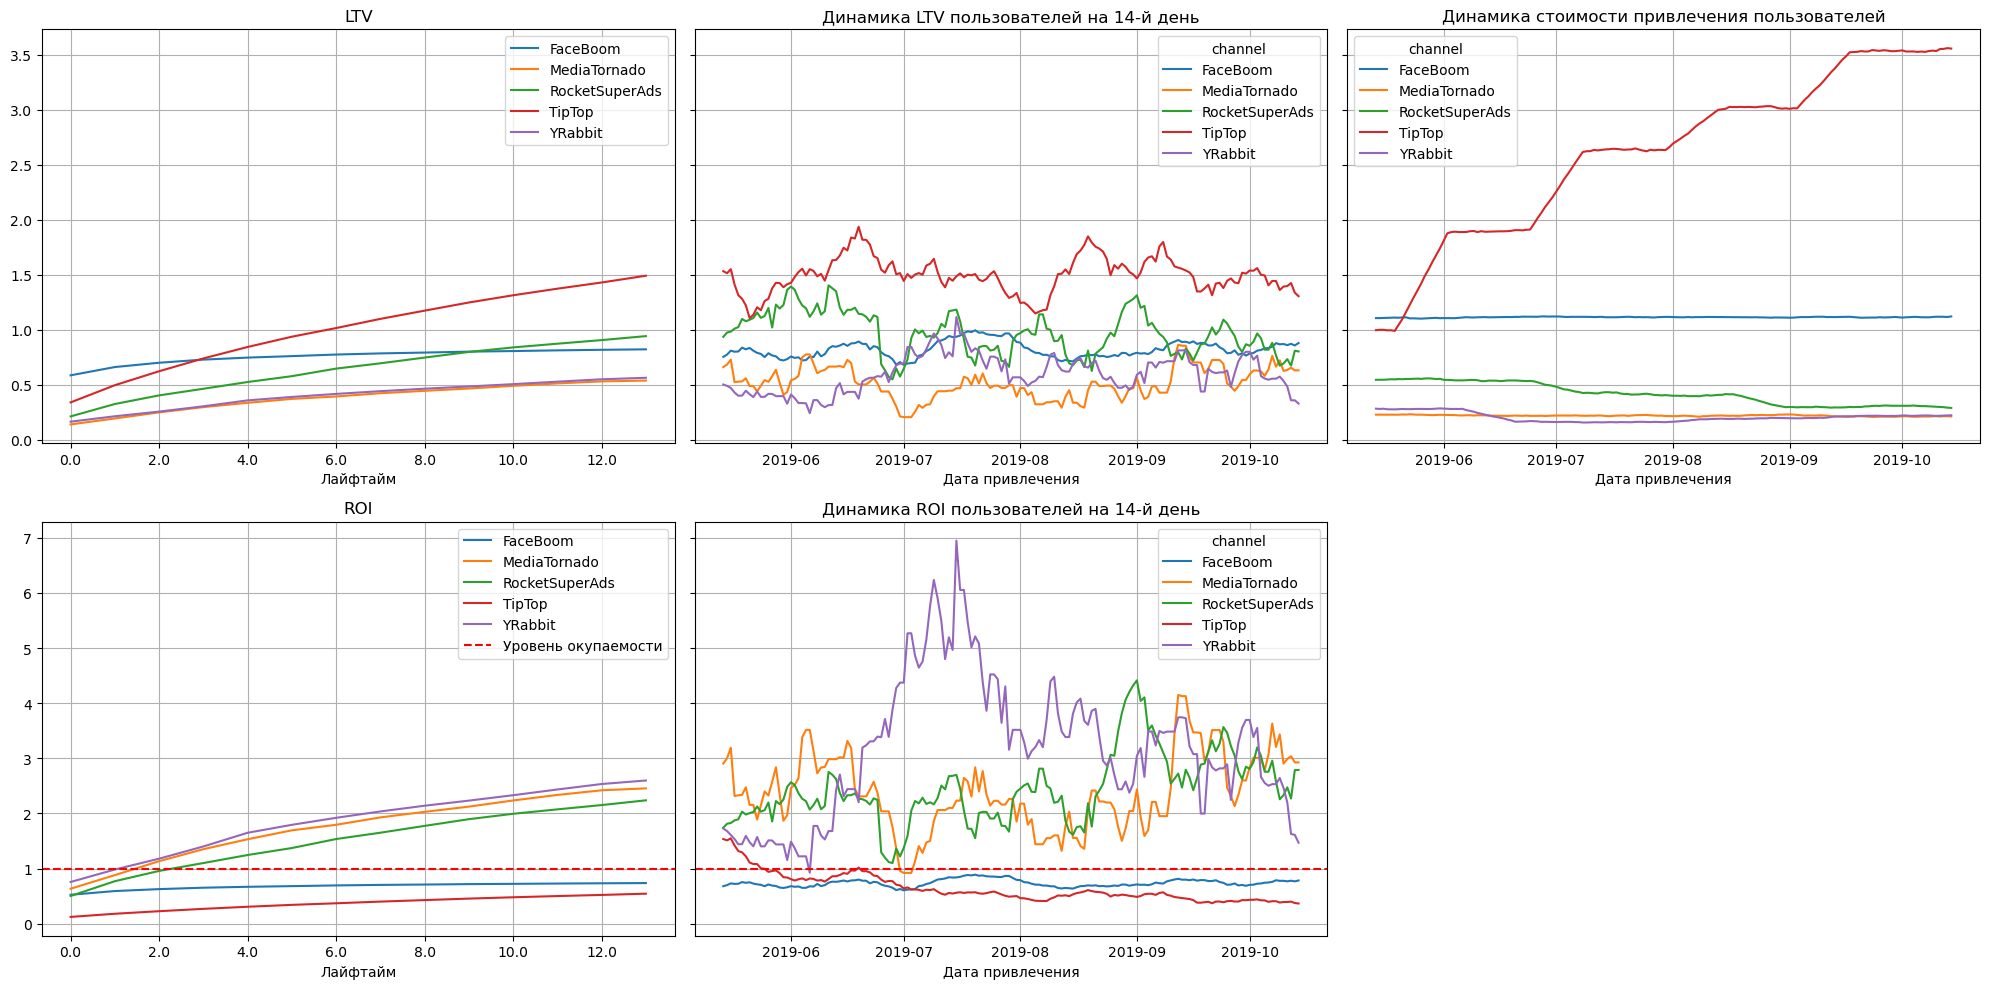

In [43]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles=profiles_cac_usa ,
    purchases=orders,
    observation_date=observation_date,
    horizon_days = horizon,
    dimensions=['channel'],
    ignore_horizon=False
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon, window=14)

Построили графики LTV, ROI и их динамики в разрезе USA и с разбивкой по каналам привлечения, можно сказать следующее:  
- LTV TipTop к 14 днню "жизни" пользователя достигает 1.5, по остальным каналам ниже 1.0
- рост CAC у TipTop значителен -  c 1.0 до 3.5 к октябрю, вместе с этим окупаемость по TipTop и FaceBoom ниже уровня окупаемости
- **относительно высокие затраты на рекламу (CAC до 3.5 у TipTop и CAC выше 1.0 у FaceBoom) в 2 каналах не дают своего результата и тянут общую окупаемость вниз**

In [44]:
profiles_cac_eur = profiles_cac.query('region != "United States"')

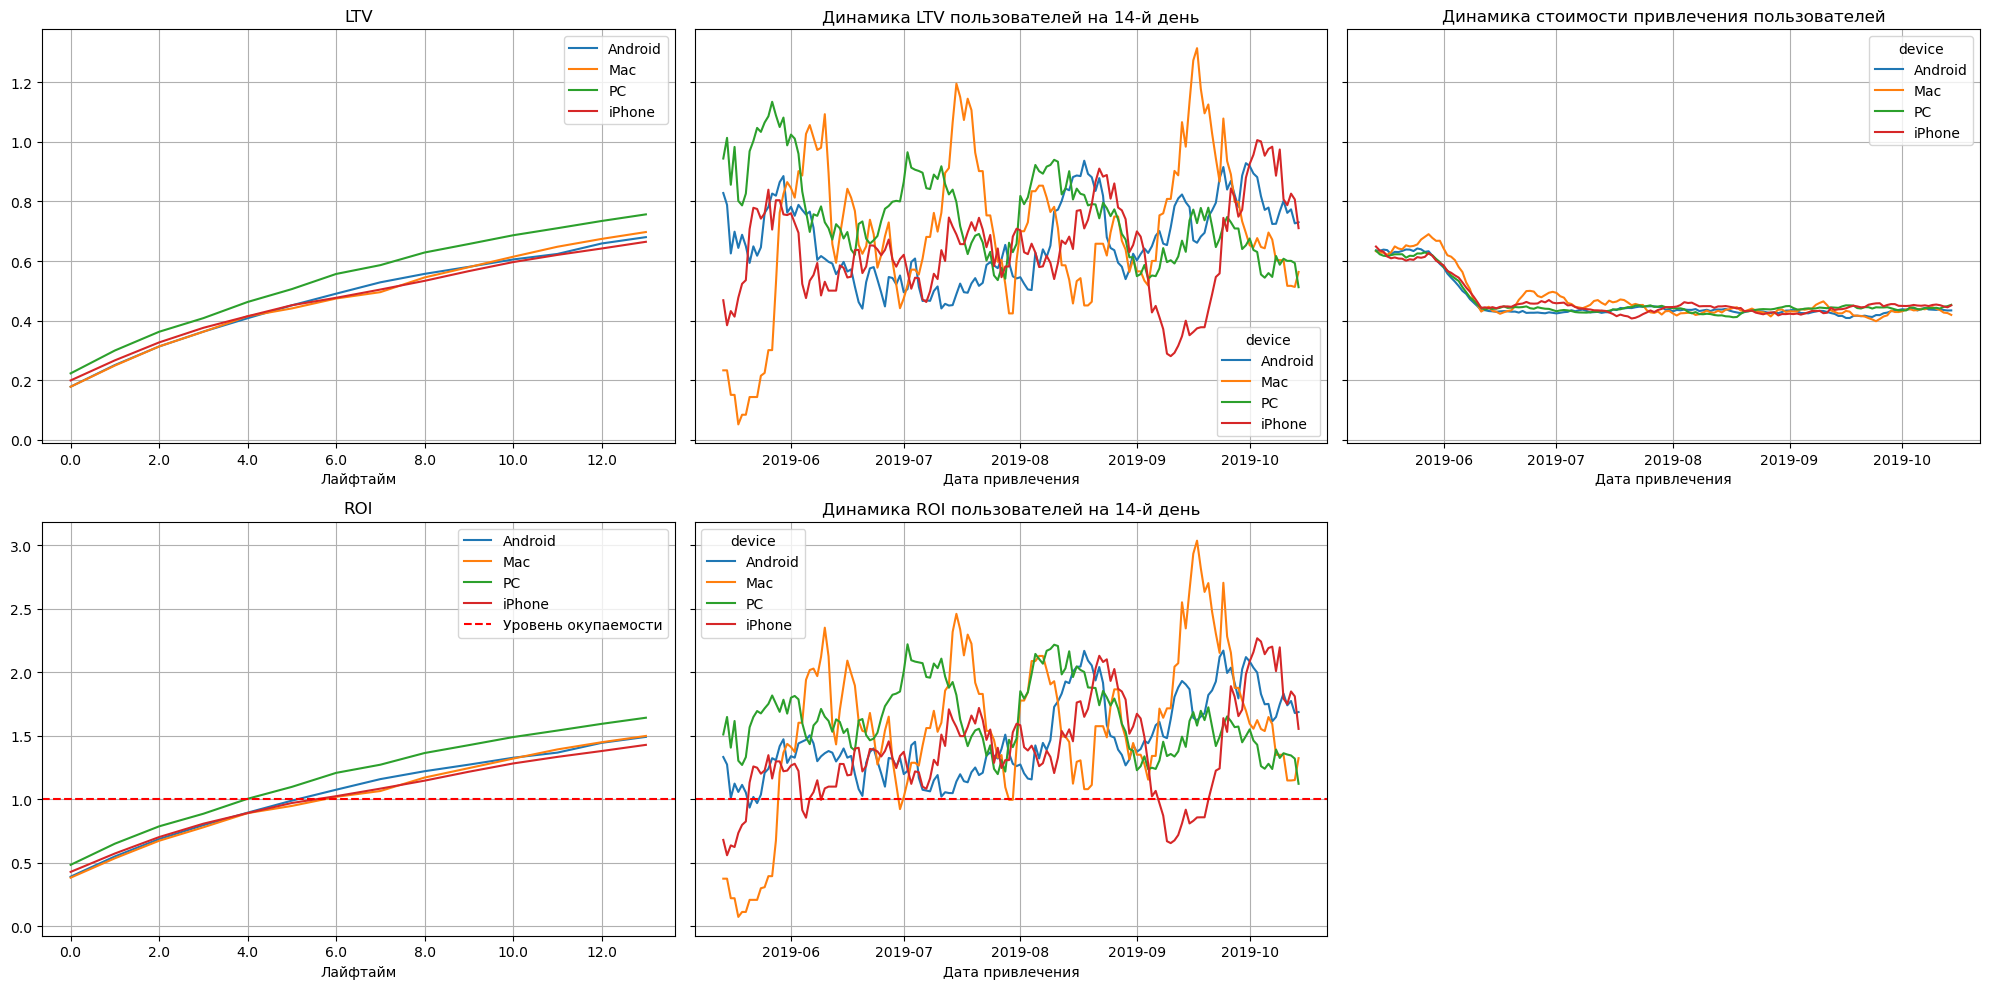

In [45]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles=profiles_cac_eur ,
    purchases=orders,
    observation_date=observation_date,
    horizon_days = horizon,
    dimensions=['device'],
    ignore_horizon=False
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon, window=14)

Построили графики LTV, ROI и их динамики в разрезе Европейских стран и с разбивкой по устройствам, можно сказать следующее:  
- LTV европейских стран по всем устройства приблизительно одинакова и находистя на уровне ниже USA  
- CAC значительно ниже чем у USA
- ROI по всем устройствам выше уровня окупаемости
- **LTV ниже чем у USA, но с учетом заметно меньших затрат на привлечения пользователя уровенбь окупаемости по всем устройвам выше 1.0**

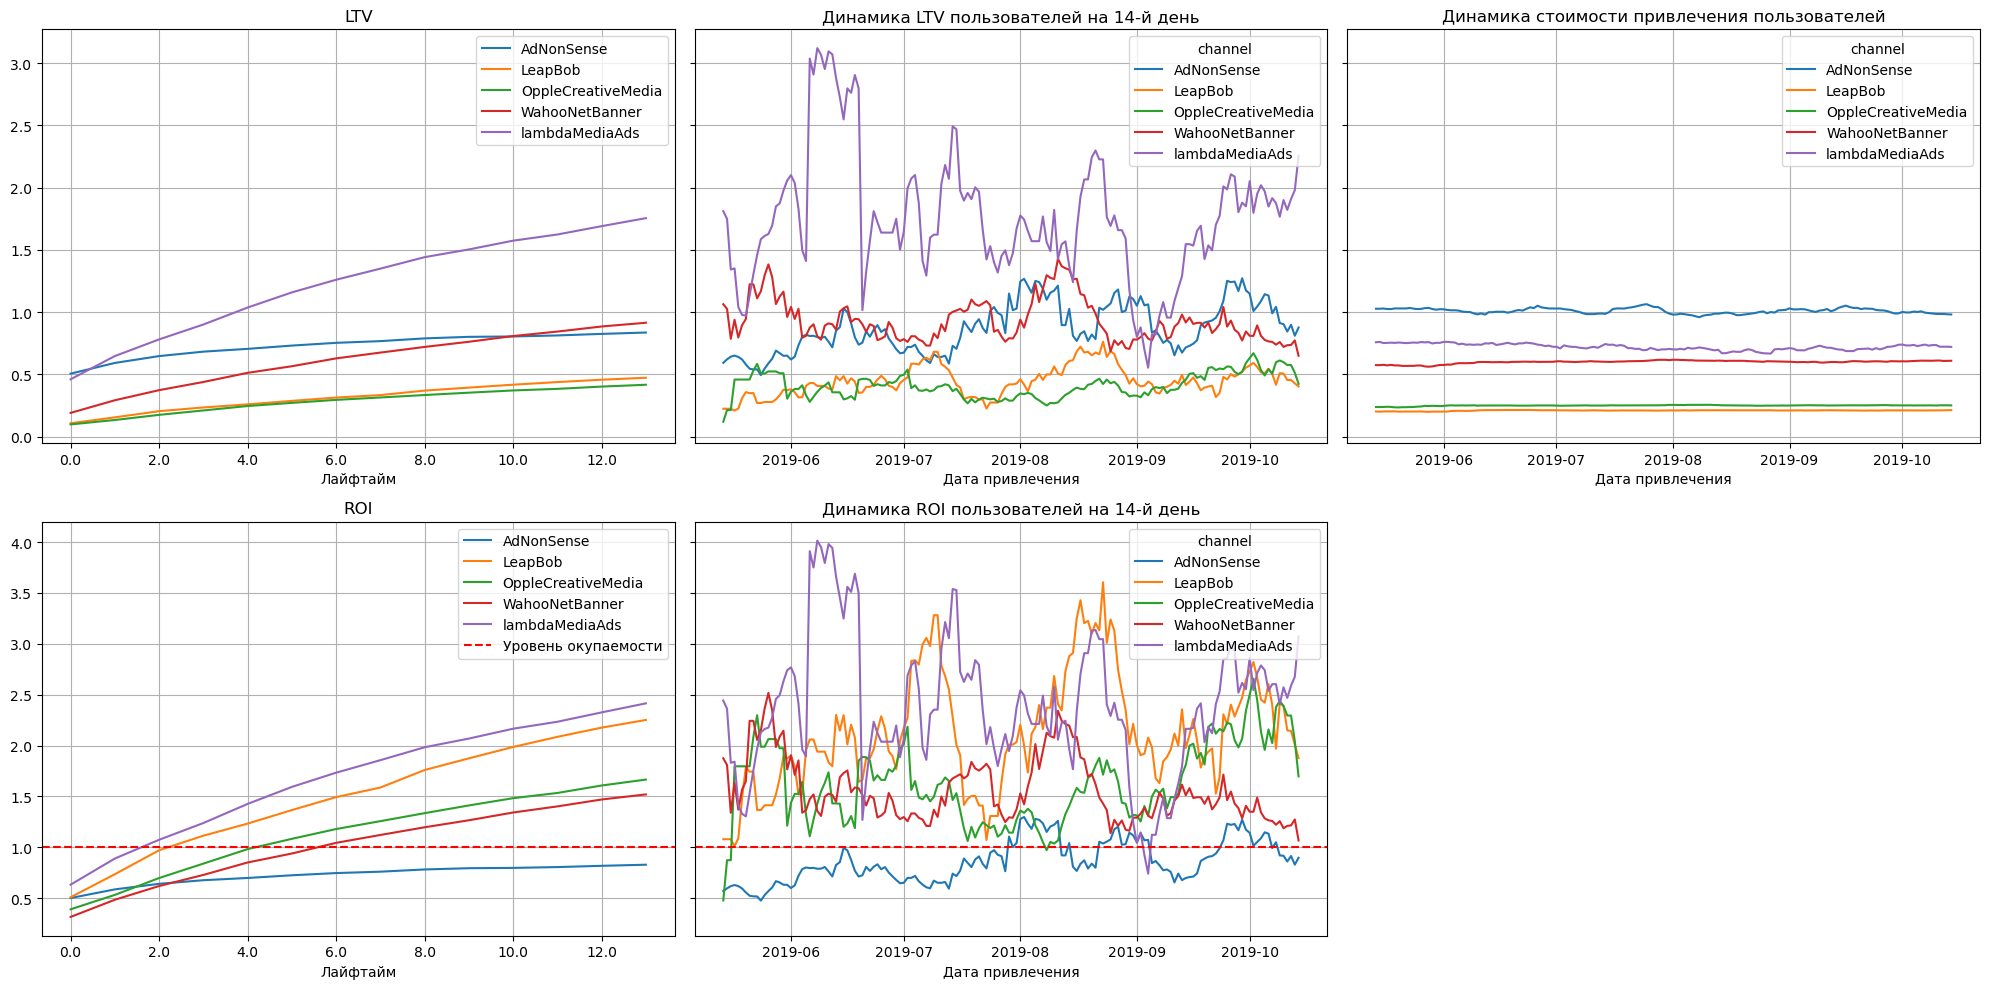

In [46]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles=profiles_cac_eur ,
    purchases=orders,
    observation_date=observation_date,
    horizon_days = horizon,
    dimensions=['channel'],
    ignore_horizon=False
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon, window=14)

Построили графики LTV, ROI и их динамики в разрезе Европейских стран и с разбивкой по каналам привлечения, можно сказать следующее:  
- LTV канала  LambdaMediaAds  в 2-3 раза выше остальных каналов привлечения и находится на высоком уровне 1.7-1.8
- Стоимость привлечения у 3 каналов с наибольшим LTV чуть выше, **необходимо обратить внимание на LambdaMediaAds, при не самом высоком CAC выдает значительно большие LTV пользователей**
- ROI по всем каналам, за исключением AdNonSense, выше уровня окупаемости

По графикам можно сделать следующие выводы:
 - начиная с мая-июня CAC стал значительно расти, вместе с этим стал подать ROI ниже уровня окупаемости, к октябрю ROI находится на уровне 0.7, значит **увеличение раекламных расходов уменьшило окупаемость**
 - вцелом поведение конверсии выглядит нормально, но **находится на относительно низком уровне, около 0.08 к 14 дня "жизни"**
 - похожа картина по конверсии -  поведение конверсии выглядит нормально, но **находится на относительно низком уровне, около 0.08 к 14 дню "жизни"**
 - по графикам LTV и ROI  в разбивке по девайсам видим, что к октябрю окупаемость ниже уровня около 0.6 - 0.7 по всем устройствам
 - LTV у пользователей из USA заметно выше, чем у пользователей из дргуих стран
 - значительный рост (в 2-2.5 раза) СAC по пользователям из USA повляило на ROI у USA - **значительное увеличение расходов на маркетинг в USA повлек пдаение ROI на уровень ниже окупаемости (до 0.5)**
- вцелом **Не окупаются 3 канала привлечения -  Tiptop, Faceboom, AdNonSense**
 ***в разрезе USA:***
- LTV находится на относительно хороешм уровне, НО CAC постоянно растет от 0.8 в июне дро 1.8 в октябре - очень значительный рост
- рост CAC значителен, вместе с этим ROI падает, **увеличение затрат на рекламу не дает своих плодов**
- относительно высокие затраты на рекламу **(CAC до 3.5 у TipTop и CAC выше 1.0 у FaceBoom)** в 2 каналах не дают своего результата и тянут общую окупаемость вниз
  ***в разрезе стран EUR:***
- **LTV ниже чем у USA, но с учетом заметно меньших затрат на привлечения пользователя уровенбь окупаемости по всем устройвам выше 1.0**
- LTV канала  LambdaMediaAds  в 2-3 раза выше остальных каналов привлечения и находится на высоком уровне 1.7-1.8
- Стоимость привлечения у 3 каналов с наибольшим LTV чуть выше, **необходимо обратить внимание на LambdaMediaAds, при не самом высоком CAC выдает значительно большие LTV пользователей**
- ROI по всем каналам, за исключением AdNonSense, выше уровня окупаемости
  


In [47]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days = horizon,
    dimensions=['region'],
    ignore_horizon=False,
)

retention_raw, retention_grouped, retention_history = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days = horizon,
    dimensions=['region'],
    ignore_horizon=False,
)

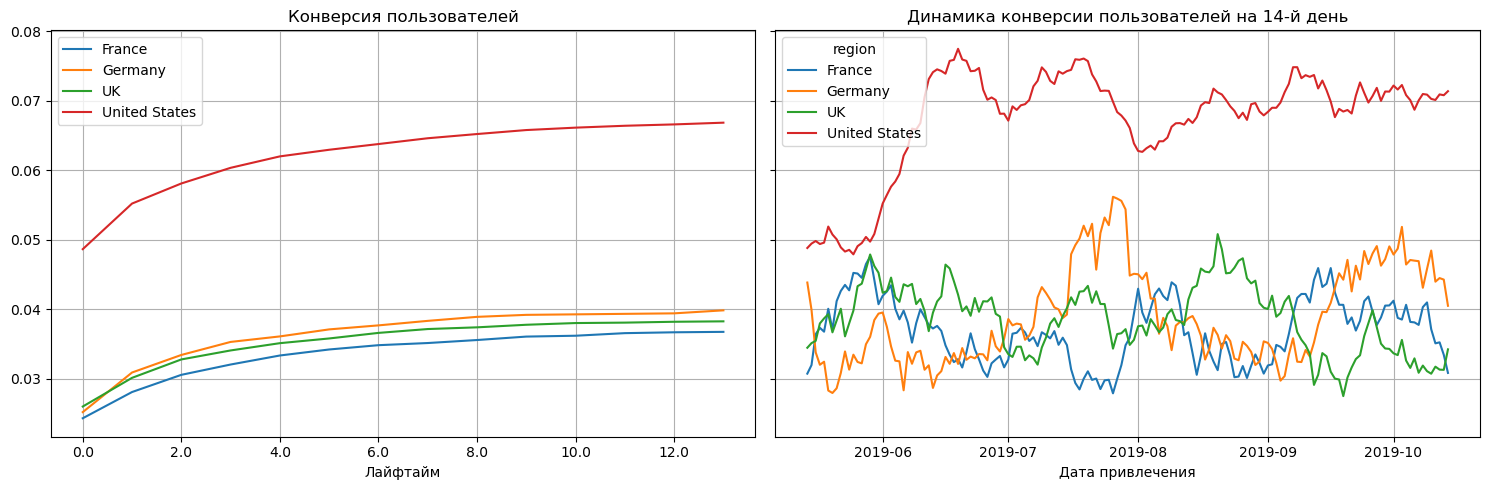

In [48]:
plot_conversion(conversion_grouped, conversion_history, horizon, window=14)

Видим, что показатели конверсии низки и находятся на уровне 0.02-0.04, но лидером по конверсии является USA  с показателем около 0.07

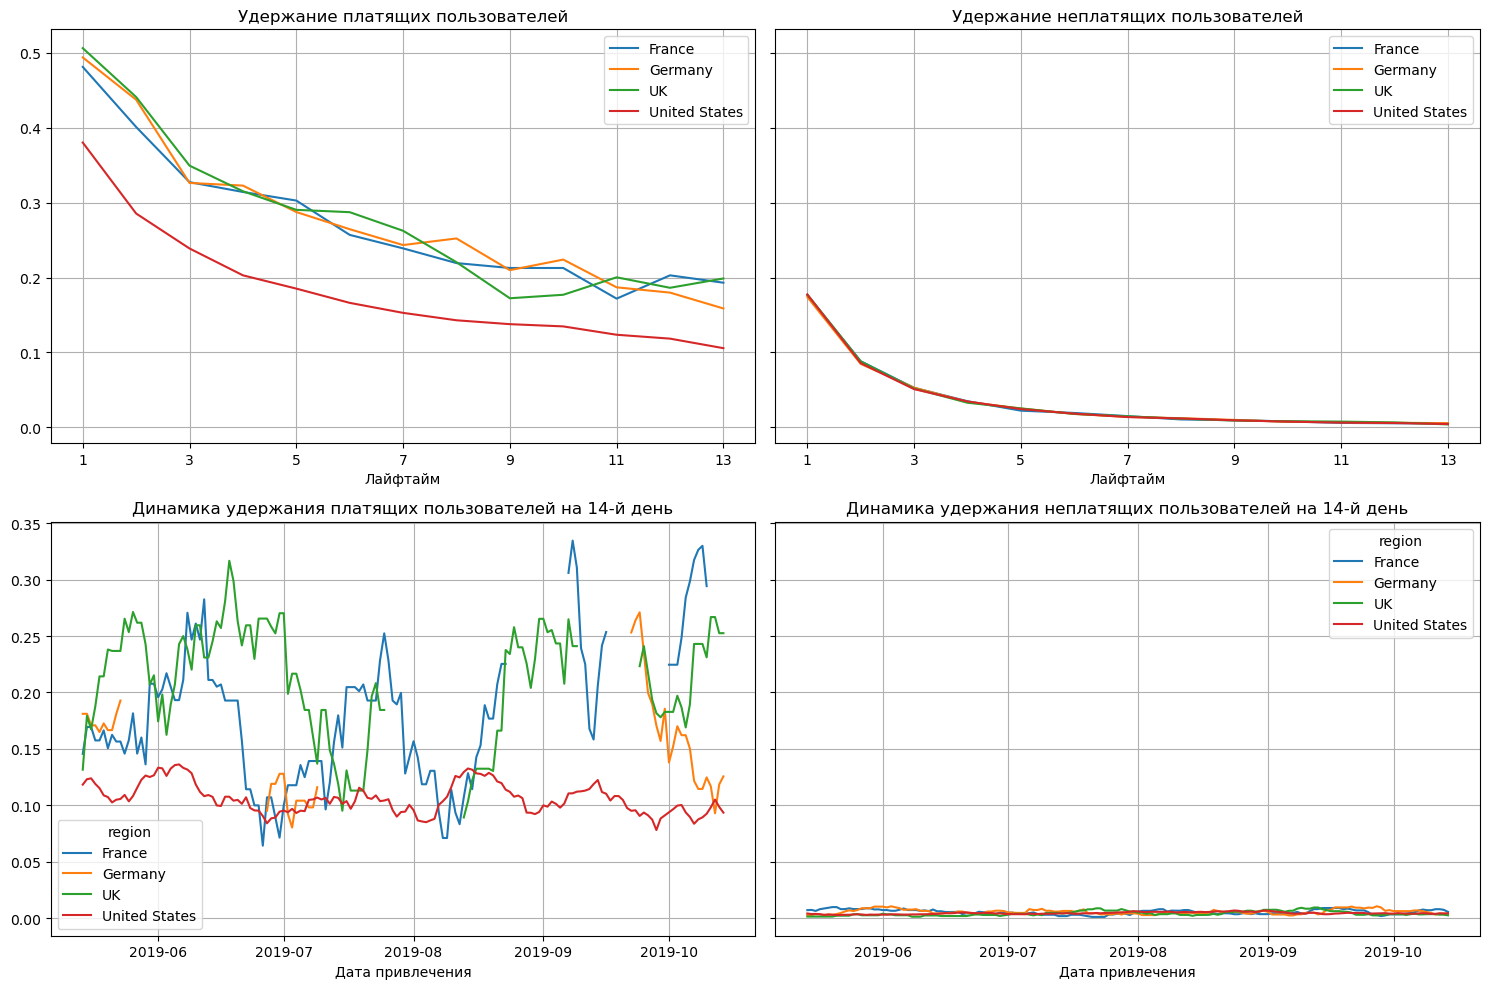

In [49]:
plot_retention(retention_grouped, retention_history, horizon, window=14)

Можем заметить, что в USA наблюдаются проблемы с удержанием пользователей.  

In [50]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days = horizon,
    dimensions=['channel'],
    ignore_horizon=False,
)

retention_raw, retention_grouped, retention_history = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days = horizon,
    dimensions=['channel'],
    ignore_horizon=False,
)

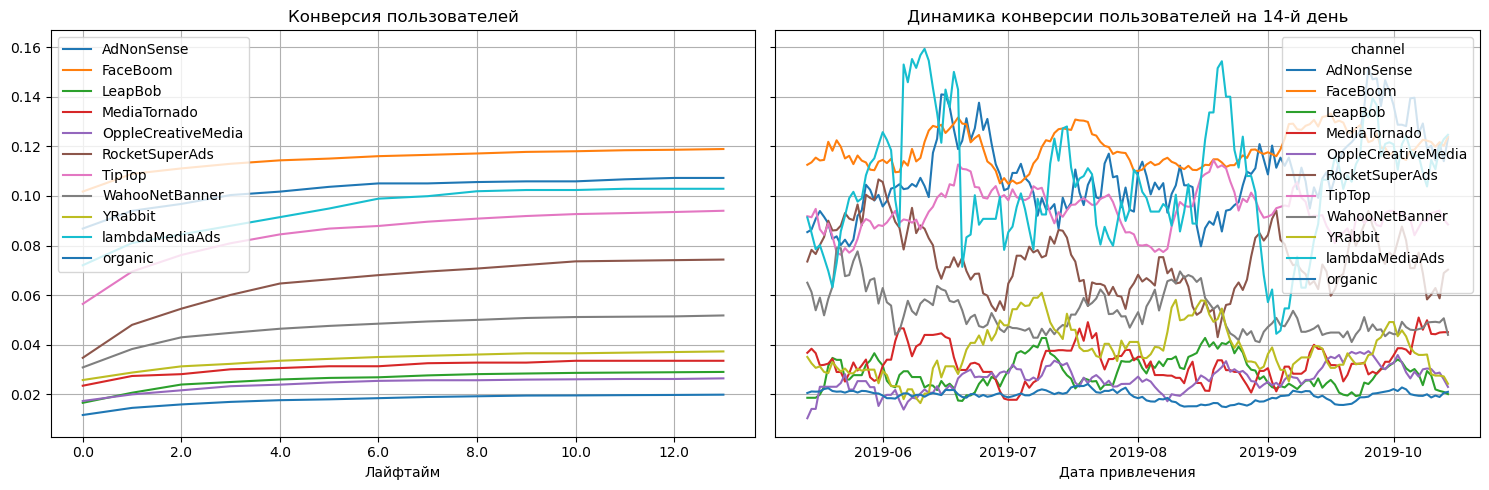

In [51]:
plot_conversion(conversion_grouped, conversion_history, horizon, window=14)

Также имеются проблемы с очень нихкой конверсией пользователей, у "органиков" конверсия ниже только в сравнении с FaceBoom, у остальных каналов привлечения конверсия ниже "органиков" и находится на уровне ниже 0.10

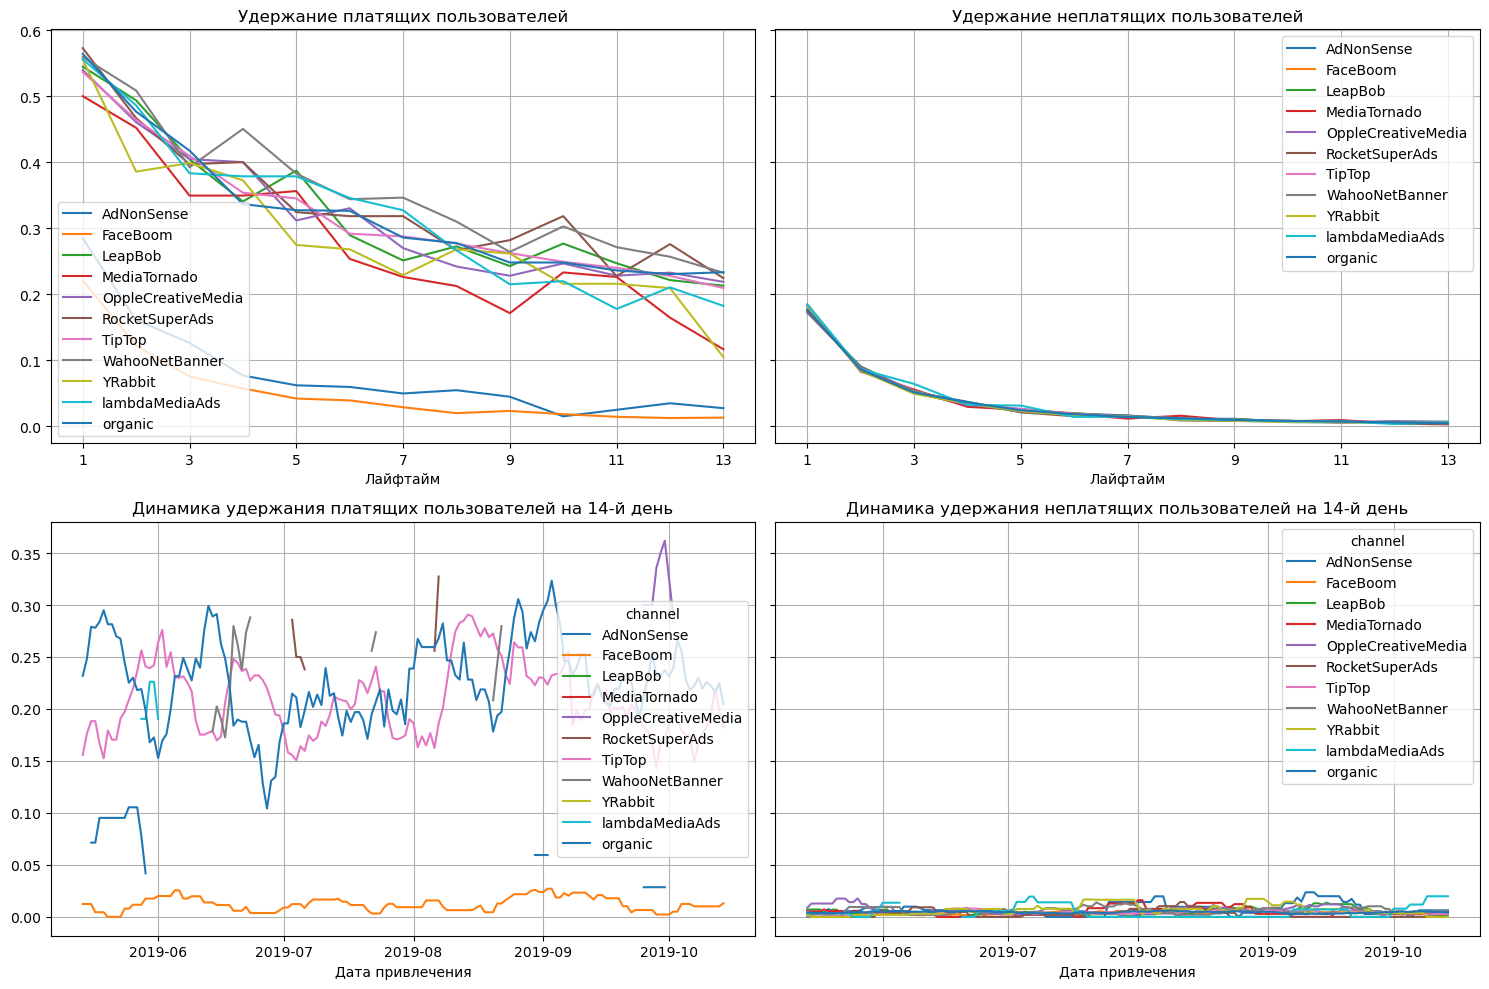

In [52]:
plot_retention(retention_grouped, retention_history, horizon, window=14)

Видим **аномально низкое удержание у FaceBoom и AdNonSense**, что говорит о явных техническиих проблемах

In [53]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days = horizon,
    dimensions=['device'],
    ignore_horizon=False,
)

retention_raw, retention_grouped, retention_history = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days = horizon,
    dimensions=['device'],
    ignore_horizon=False,
)

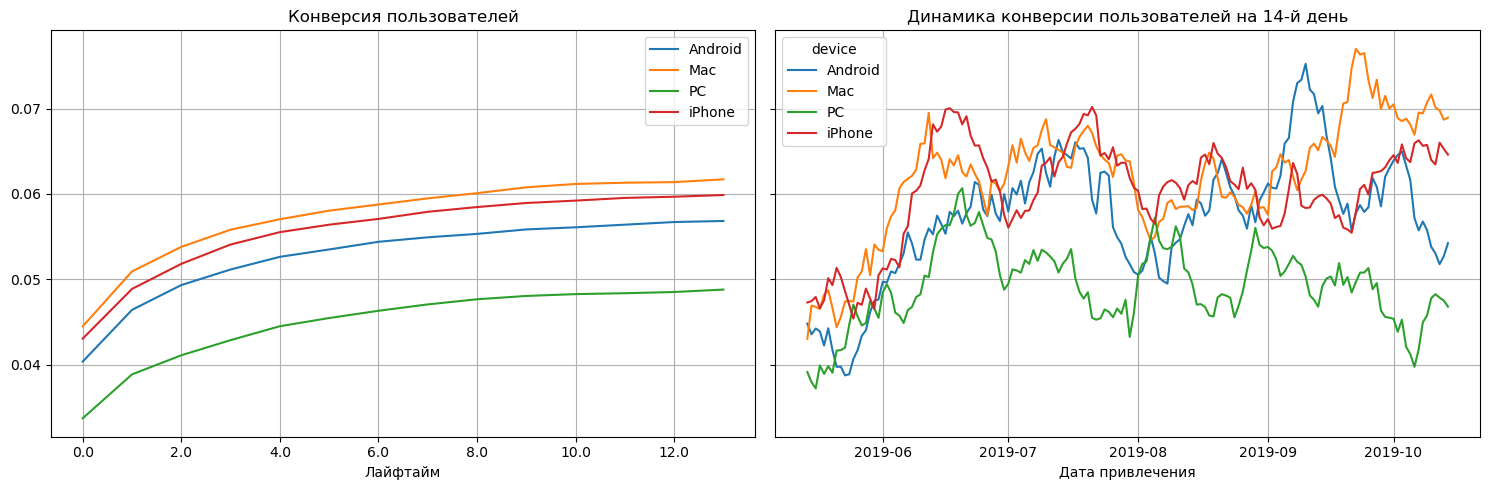

In [54]:
plot_conversion(conversion_grouped, conversion_history, horizon, window=14)

Показатели конверсии низки, но какихто подозрительных поведений графика в значениях с разбивкой по устройствам нет

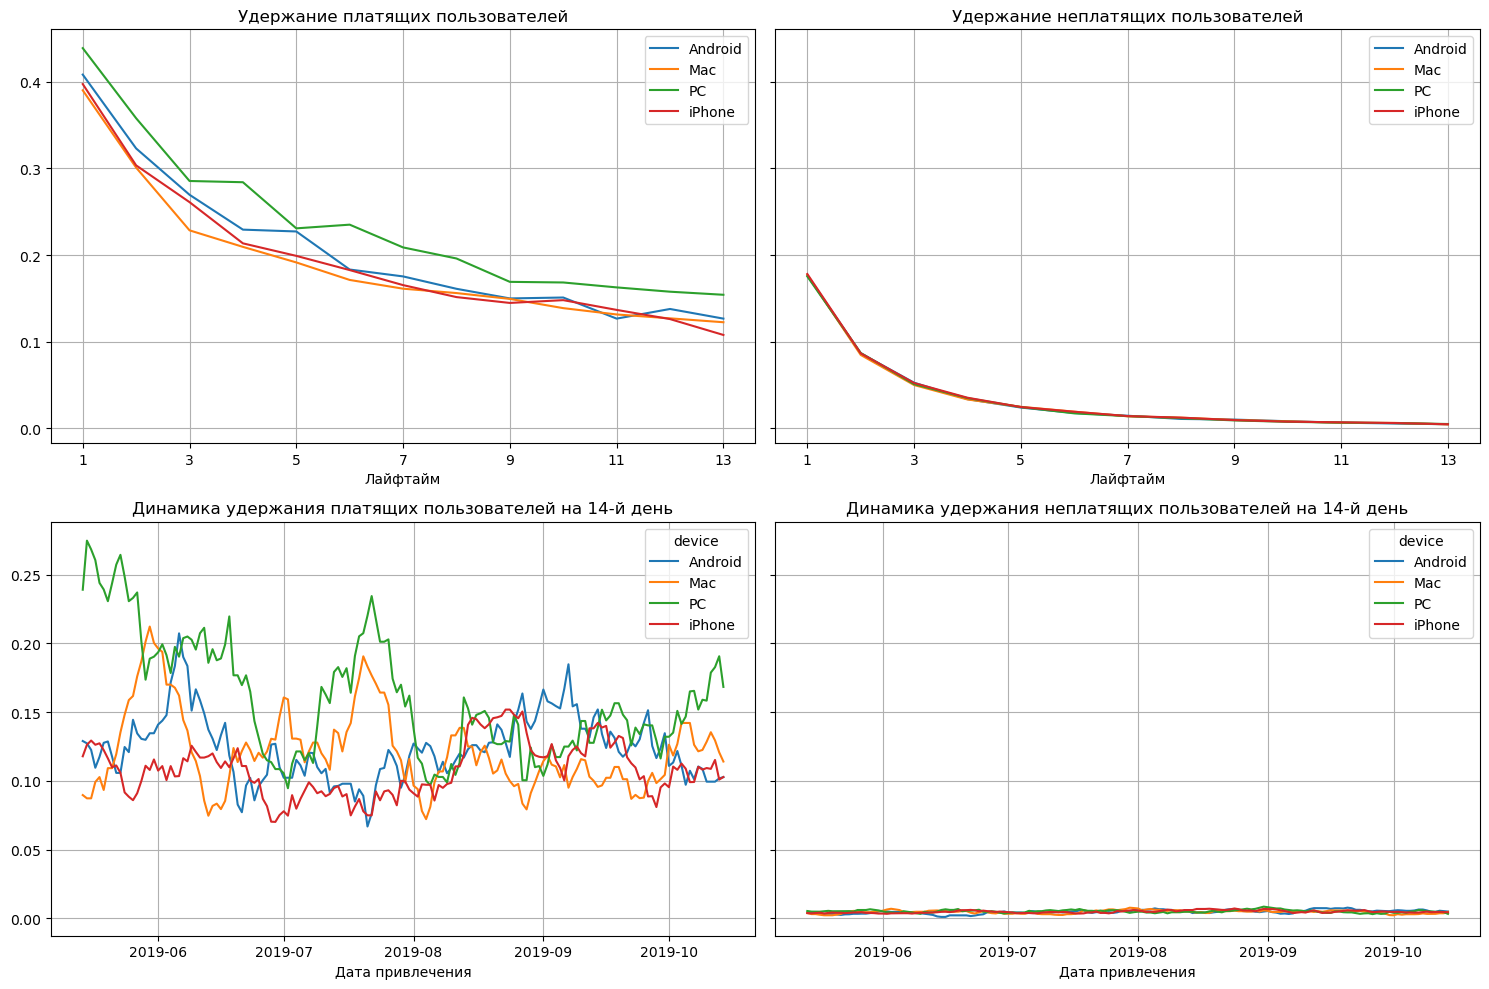

In [55]:
plot_retention(retention_grouped, retention_history, horizon, window=14)

Тоже самое с показателями удержания пользователей - показатели низки, но какихто подозрительных поведений графика в значениях с разбивкой по устройствам нет

Вцелом, как видим по первым графикам окупаемость рекламы была выше или рядом с уровнем окупаемости до 2019-07, далее стала снижаться и упала ниже уровня окупаемости  
Эффективность рекламы в USA вызывает большие вопросы, при значительно увеличении стоиомсти привлечения пользователей ROI заметно снизилась и упала ниже уровня окупаемости
Необходимо обратить внимание на возможные проблемы с Mac, Iphone т.к траты на рекламу в разбивке по этим устройствам растут, а окупаемость падает  
Необходимо обратить внимание на возможные проблемы с TipTop т.к траты на рекламу в разбивке по этому каналу растёт значительно, а окупаемость падает  
Также в USA присутствуют заметные пробьлемы с удержанием пользователей
  
  
Из перспективных каналов привлечения можем выделить: Yrabbit, MediaTornado, RocketSuperAds - затраты на привлечения пользователя относительно минимальны, а уровень окупаемости выше 2 

Есть большие проблемы с удержанием пользователей по каналу привлечения FaceBoom с учетом максимальных трат на привлечение пользователя удержание по этому каналу аномально низкое близко к 0, стоит обратить на это внимание и разобраться


# Общий вывод по проекту спринта "Анализ бизнес-показателей"  
  
### В проекте изучили пользователей приложения, провели анализ окупаемости маркетинговых трат, выявили проблемные направления и сформулировали возможные пути решения  

* **Раздел загрузки и предобработки данных:**  
 - Загрузили данные, задали датасеты для работы
 - Провели предобработку - проанализировали пропуски и дубликаты
 - Перевели наименования столбцов в общепринятый и удобный для работы формат  
 
* **Раздел задания LTV, ROI, удержания и конверсии:**
 - В данном разделе задали определния функция для дальней работы и анализа основных бизнесс показателей  
 
* **Раздел исследовательского анализа данных:**  
 - Посмотрели информацию о данных, определили минимальное и максимальное значение даты в данных:
     Минимальная дата привлечения пользователя - 2019-05-01
     Максимальная дата привлечения пользователя - 2019-10-27 (момент анализа)
 - Получили таблицу профилей пользователей для дальнейшей работы  
 - Вывели лидеров в разбивке по странам, каналам и устройствам:
     USA является уверенным лидеров и по количеству пользователей и по количеству платящих пользователей, далее идут UK,    France, Germany пользователи из которых при правильном подхожде могут стать заметными точками роста для продукта/
    Среди пользователей iphone больше платящих, чем среди пользователей других устройств, но доля платящих или конверсия выше у Mac.
    Заметным лидером по привелечению пользователей является FaceBoom с хорошей конверсией пользователей в платящих.
    
* **Раздел маркетинговы анализ:**
 - Общая сумма расходов на маркетинг составила 105497.3
 - Средняя стоимость привлечения одного пользователя(CAC) составила 0.70
 - FaceBoom лидер по привлеченным пользователям с наибольшей конверсией
 
 * **Раздел анализа параметров LTV, ROI и CAC:**
**По графикам можно сделать следующие выводы:**
 - начиная с мая-июня CAC стал значительно расти, вместе с этим стал подать ROI ниже уровня окупаемости, к октябрю ROI находится на уровне 0.7, значит **увеличение раекламных расходов уменьшило окупаемость**
 - вцелом поведение удержа выглядит нормально, но **находится на относительно низком уровне, около 0.08 к 14 дня "жизни"**
 - по графикам LTV и ROI  в разбивке по девайсам видим, что к октябрю окупаемость ниже уровня около 0.6 - 0.7 по всем устройствам
 - LTV у пользователей из USA заметно выше, чем у пользователей из дргуих стран
 - значительный рост (в 2-2.5 раза) СAC по пользователям из USA повляило на ROI у USA - **значительное увеличение расходов на маркетинг в USA повлек пдаение ROI на уровень ниже окупаемости (до 0.5)**
- вцелом **Не окупаются 3 канала привлечения -  Tiptop, Faceboom, AdNonSense**
- имеются проблемы с очень низкой конверсией пользователей, у "органиков" конверсия ниже только в сравнении с FaceBoom, у остальных каналов привлечения конверсия ниже "органиков" и находится на уровне ниже 0.10
- Видим **аномально низкое удержание у FaceBoom и AdNonSense**


***в разрезе USA:***
- LTV находится на относительно хороешм уровне, НО CAC постоянно растет от 0.8 в июне дро 1.8 в октябре - очень значительный рост
- рост CAC значителен, вместе с этим ROI падает, **увеличение затрат на рекламу не дает своих плодов**
- относительно высокие затраты на рекламу **(CAC до 3.5 у TipTop и CAC выше 1.0 у FaceBoom)** в 2 каналах не дают своего результата и тянут общую окупаемость вниз
 
 
 ***в разрезе стран EUR:***
- **LTV ниже чем у USA, но с учетом заметно меньших затрат на привлечения пользователя уровень окупаемости по всем устройвам выше 1.0**
- LTV канала  LambdaMediaAds  в 2-3 раза выше остальных каналов привлечения и находится на высоком уровне 1.7-1.8
- Стоимость привлечения у 3 каналов с наибольшим LTV чуть выше, **необходимо обратить внимание на LambdaMediaAds, при не самом высоком CAC выдает значительно большие LTV пользователей**
- ROI по всем каналам, за исключением AdNonSense, выше уровня окупаемости
**В части конверсии и удержания:**
- в USA наблюдаются проблемы с удержанием пользователей - удержание платязих 1 дня от 0.4 до 0.1 к 14 дню



 
 
## Рекомендации :
### - Обратить внимание на неэффективность маркетинговых трат в USA, высокие показатели CAC вцелом по USA, в частности по TipTop и FaceBoom, возможно имеются некие технические проблемы с некоторыми каналами привлечения
### - Также видим аномально низкий уровень удержания в USA, возможно имеются локальные технические сбои в приложении в USA
### - Вцелом по странам есть проблемы с окупаемостью у каналов привлечения Tiptop, Faceboom, AdNonSense - стоит оценить рентабельность вложения больших трат по этим каналам, с учетом аномально низкого удержание у FaceBoom и AdNonSense
### - Стоит обратить внимание в странах Европы на LambdaMediaAds, при не самом высоком CAC выдает значительно большие LTV пользователей
### - Вцелом можно обратить дополнительно внимание на каналы RocketSuperAds и WahooNetBanner - с учетом невысокой стоимости CAC, относительно неплохой конверсией и удержанием и ROI выше 1. то при увеличениии  маркети нговых бюджетов по этим каналам может повысить окупаемость вцелом  



